# Overview


### 📌Bitcoin Sentiment Market Analysis for Traders

`The Bitcoin Fear & Greed Index helps traders understand the emotional condition of the crypto market.Market sentiment directly impacts price movement, volatility, and short-term opportunities`


In [573]:
import numpy as np
import pandas as pd

**Here we are Loading the Dataset**

In [574]:
v = pd.read_csv("/kaggle/input/cryptotrademarketsentiments/fear_greed_index.csv")

**Dataset Sample**

In [575]:
v.sample(5)

,timestamp,value,classification,date
1104,1613107800,92,Extreme Greed,2021-02-12
1656,1660800600,30,Fear,2022-08-18
90,1525498200,63,Greed,2018-05-05
151,1530768600,37,Fear,2018-07-05
304,1543987800,19,Extreme Fear,2018-12-05


**Dataset Shape**

In [576]:
v.shape
# 2644 rows we have and 4 features we have.

(2644, 4)

**To see Null values**

In [577]:
v.isnull().sum()
# we do not have any null values.


timestamp         0
value             0
classification    0
date              0
dtype: int64

**Dropping 	timestamp feature**

In [578]:
v.drop('timestamp', axis=1, inplace=True)

# we already have  date in given dataset
# so there is no need to decode it.
# that why we dropped it.


**Dataset in correct format**

In [579]:
v.sample(5)


,value,classification,date
2363,68,Greed,2024-07-25
1700,20,Extreme Fear,2022-10-01
1969,59,Greed,2023-06-27
1498,21,Extreme Fear,2022-03-13
1153,74,Greed,2021-04-02


In [580]:
v["classification"].unique()
# bitcoin market sentiments type.


array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

**Bitcoin Market Sentiments Type**

In [581]:
# 1. Fear
# 2. Extreme Fear
# 3. Neutral
# 4. Greed
# 5. Extreme Greed

# Sentiment Ranges

**Extreme Fear  Value Range**

In [582]:
xfear_data = v[v["classification"] == "Extreme Fear"]
xfear_min = xfear_data["value"].min()
xfear_max = xfear_data["value"].max()

print("Extreme Fear Range:", xfear_min, "to", xfear_max)


Extreme Fear Range: 5 to 24


**Fear Value Range**

In [583]:
fear_data = v[v["classification"] == "Fear"]
fear_min = fear_data["value"].min()
fear_max = fear_data["value"].max()

print(" Fear Range:", fear_min, "to", fear_max)


 Fear Range: 25 to 44


**Neutral Value Range**

In [584]:
neutral_data = v[v["classification"] == "Neutral"]
neutral_min = neutral_data["value"].min()
neutral_max = neutral_data["value"].max()

print("Neutral Range:", neutral_min, "to", neutral_max)


Neutral Range: 45 to 54


**Greed Value Range**

In [585]:
greed_data = v[v["classification"] == "Greed"]
greed_min = greed_data["value"].min()
greed_max = greed_data["value"].max()

print("Greed Range:", greed_min, "to", greed_max)


Greed Range: 55 to 74


**Extreme Greed Value Range**

In [586]:
extreme_greed_data = v[v["classification"] == "Extreme Greed"]
extreme_greed_min = extreme_greed_data["value"].min()
extreme_greed_max = extreme_greed_data["value"].max()

print("Extreme Greed Range:", extreme_greed_min, "to", extreme_greed_max)


Extreme Greed Range: 75 to 95


**Sentiments Ranges Conclusion**

In [587]:
# In Our dataset the sentiments types ranges is :

# 1. Extreme Fear Range   :  5 to 24
# 2. Fear Range           :  25 to 44
# 3. Neutral Range        :  45 to 54
# 4. Greed Range          :  55 to 74
# 5. Extreme Greed Range  :  75 to 100


**Frequency of Market Sentiments**

In [588]:
v["classification"].value_counts()


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

**Visualisation Frequency of Market Sentiments**

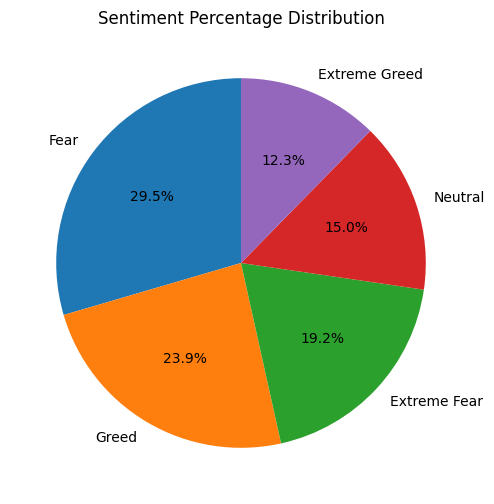

In [589]:
import matplotlib.pyplot as plt
import seaborn as sns
v["classification"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    startangle=90,
    ylabel=""
)
plt.title("Sentiment Percentage Distribution")
plt.show()


**Conclusion :  Frequency of Market Sentiments**

In [590]:
#  Fear occurred most often (781 days),
#  followed by Greed (633 days).
#  Overall, the market stayed more in fear
#  than in positive sentiment.

In [591]:
v["date"] = pd.to_datetime(v["date"])

**Year Range**

In [592]:
v["date"].dt.year.unique()
# we have total 8 years of data
# of bitcoin sentiments.

array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype=int32)

In [593]:
v["year"] = v["date"].dt.year

**Year Sentiment Correlation**

In [594]:
v.groupby("year")["classification"].agg(lambda x: x.value_counts().idxmax())


year
2018            Fear
2019            Fear
2020            Fear
2021           Greed
2022    Extreme Fear
2023           Greed
2024           Greed
2025            Fear
Name: classification, dtype: object

In [595]:
v["month"] = v["date"].dt.month

In [596]:
v.groupby("month")["classification"].agg(lambda x: x.value_counts().idxmax())


month
1             Greed
2             Greed
3              Fear
4             Greed
5             Greed
6      Extreme Fear
7              Fear
8              Fear
9              Fear
10             Fear
11    Extreme Greed
12             Fear
Name: classification, dtype: object

**Monthly Visualisation of sentiments**

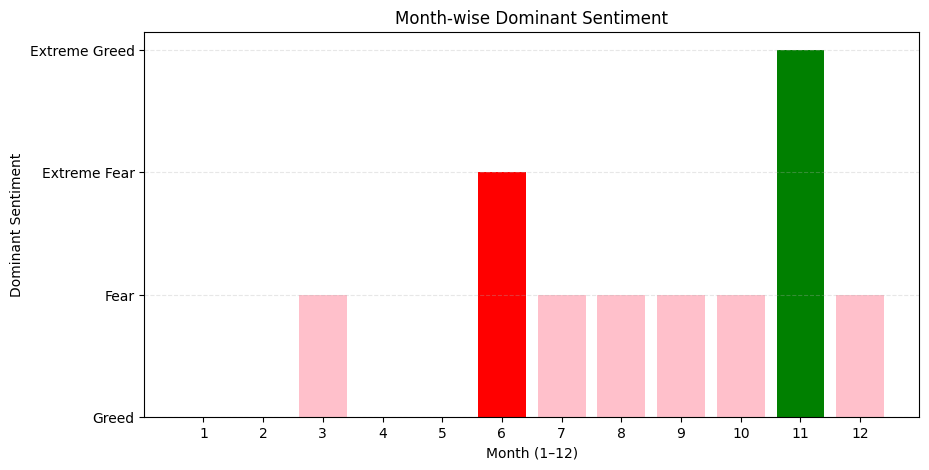

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add month column
v["month"] = v["date"].dt.month

# Step 2: Find dominant sentiment for each month
month_dom = v.groupby("month")["classification"].agg(lambda x: x.value_counts().idxmax())

# Step 3: Convert result to DataFrame for plotting
month_dom_df = month_dom.reset_index()
month_dom_df.columns = ["month", "dominant_sentiment"]

# Step 4: Custom colors for each sentiment
colors = {
    "Extreme Fear": "red",
    "Fear": "pink",
    "Greed": "lightgreen",
    "Extreme Greed": "green"
}

# Step 5: Map colors to the dataframe
month_dom_df["color"] = month_dom_df["dominant_sentiment"].map(colors)

# Step 6: Plotting
plt.figure(figsize=(10,5))
plt.bar(month_dom_df["month"], month_dom_df["dominant_sentiment"],
        color=month_dom_df["color"])

plt.xticks(month_dom_df["month"])
plt.xlabel("Month (1–12)")
plt.ylabel("Dominant Sentiment")
plt.title("Month-wise Dominant Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()

# here we can see that in june month  market is in extreme fear
# and in december month market is in extreme greed.


**Final Conclusion of Market Bitcoin sentiment**

In [598]:
#   Fear sentiment in market is dominated throughout
#   from 2018 to 2025 , except 2021 , 2023 and 2024.
#   in 2022 fear sentiment was at  extreme level in Market.

#   1st quarter of year is quite better for bitcoin market
#   than other quarters.
#   only November month is better for bitcoin market among
#   other months in 2 nd and 3 rd quarter in year.

**Last Final Important Insight :**

In [599]:
#  Based on the sentiment data from 2018–2025,
#  roughly first quarter appears relativel
#  safer for Bitcoin investing.

# TRADER DATASET

**My Objective "Task"**

In [600]:
#  Your objective is to explore the relationship
#  between trader performance and market
#  sentiment, uncover hidden patterns, and
#  deliver insights that can drive smarter
#  trading strategies.

In [601]:
s = pd.read_csv("/kaggle/input/cryptotrademarketsentiments/historical_data.csv")

In [602]:
s.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
108130,0x8477e447846c758f5a675856001ea72298fd9cb5,AI16Z,1.24190,1194.10,1482.95,SELL,22-01-2025 17:19,-20165.600000,Open Short,0.000000,0xe73308c645073627455b041c208bd501bd00f267ad533f9f7fd47d3060e33037,65583108915,True,0.519033,1.020000e+15,1.740000e+12
189425,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,12.77000,15.66,199.98,SELL,09-04-2025 19:39,1352.532122,Sell,3.187993,0x4eb63dd73a11f7d700d3042136b58402016e00a1b602a1acb7aa399b5f14bd8b,85317048582,True,0.059993,4.020000e+14,1.740000e+12
104384,0x8477e447846c758f5a675856001ea72298fd9cb5,TNSR,0.50775,300.00,152.33,BUY,09-11-2024 22:25,-36208.400000,Close Short,-0.003000,0xcd834fd55ac895ff4c4c0416630ac101690053d23cfc80fa9db2349602363806,45620348946,False,0.015232,8.140000e+14,1.730000e+12
47749,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,25.94400,210.68,5465.88,SELL,04-02-2025 03:46,-7021.230000,Open Short,0.000000,0xfa84f59bc7e2faf6e72c041d156ad20202d3007646a9ab7ff53ae77392fb2d29,69198545023,True,1.913058,9.960000e+14,1.740000e+12
36009,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,ZEREBRO,0.03167,230682.00,7305.70,SELL,21-02-2025 21:29,800454.000000,Close Long,194.003562,0x94879791c78858419a5f041e31e1d90201e2003866550e6d1eb159a92e08f1bb,73901084674,True,2.454714,6.500000e+14,1.740000e+12


**Checking missing values**

In [603]:
s.isnull().sum()
#  no missing values we have

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

**Dropping Feature**

In [604]:
s.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
53829,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,7.0023,195.63,1369.86,SELL,30-11-2024 13:10,3352.43736,Sell,134.884393,0x800376b6d1bfc091779304180f3f6802016e00048794297b9b9da716dabc156d,51439516260,True,0.479450,1.850000e+13,1.730000e+12
66185,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,21.0830,10.00,210.83,BUY,24-02-2025 20:22,28289.40000,Open Long,0.000000,0x2611f584654dd1381ca2041e619ea601bd00c361c32b33c9d67700d5e26ff320,74468249836,False,0.020239,3.830000e+14,1.740000e+12
181648,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,15.2470,109.12,1663.75,BUY,20-03-2025 06:14,-1224.18000,Close Short,16.629888,0x56c713b268b392abfb9d041fe3eca20201340001a44c5ffd13acaf69a5271107,80854287405,True,0.499125,7.510000e+14,1.740000e+12
11136,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,93226.0000,0.44,41019.44,SELL,25-04-2025 03:12,-118.14059,Open Short,0.000000,0xf530cdec53d795c28c1704222f20ae02014400c2d63a8b8205c42407a957eabf,88682938342,True,9.434471,6.180000e+14,1.750000e+12
136942,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,1.4071,24.80,34.90,SELL,17-01-2025 01:42,-798.80000,Open Short,0.000000,0xc3650bc12ffb84c4d635041b9ff5da020118009ee0869f7eb6810e9ff67cefa1,63561533402,True,0.012213,1.440000e+14,1.740000e+12


**shape in our trader dataset**

In [605]:
s.shape

(211224, 16)

In [606]:
#  Your objective is to explore the relationship
#  between trader performance and market
#  sentiment, uncover hidden patterns, and deliver
#  insights that can drive smarter trading trategies.


**Coins Types**

In [607]:
s["Coin"].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [608]:
# here we have more than 150 coins almost
# lets do grouping according to thier categories.

**A)  LARGE CAP COINS**

In [609]:
# A) LARGE CAP COINS

# 1.BTC , 2.ETH ,  3.BNB ,  4.SOL ,  5.XRP , 6.ADA ,
# 7.DOGE ,8.TON ,  9.AVAX , 10.ETC , 11.MATIC , 12.LINK

**B)  MID CAP COINS**

In [610]:
# 1.AAVE,  2.INJ,  3.GMX,  4.RNDR,  5.WLD,
# 6.FTM,  7.STX,  8.CRV,  9.COMP,  10.OP,
# 11.AR,  12.NEAR,  13.SEI,  14.PYTH,  15.JUP,
# 16.BLUR,  17.MANTA,  18.FXS,  19.FIL,  20.SUSHI,
# 21.ENS,  22.GAS,  23.DYM,  24.ARB,  25.APE,
# 26.ILV,  27.ZETA

**C) SMALL CAP**

In [611]:
# 1.EIGEN,  2.KAITO,  3.ZRO, 4.MERL,  5.TNSR,
# 6.MAV,  7.NTRN,  8.POLYX,  9.BIGTIME,  10.TURBO,
# 11.LAYER,  12.ACE,  13.STG,  14.INIT,  15.MYRO,
# 16.VIRTUAL,  17.PROMPT,  18.BIO,  19.OGN,  20.PIXEL

**4) MEME COINS**

In [612]:
# 1.WIF, 2.kPEPE, 3.kSHIB, 4.BRETT, 5.BABY,
# 6.POPCAT, 7.FARTCOIN, 8.CHILLGUY, 9.MOODENG, 10.PENGU,
# 11.MEME, 12.ME, 13.GRASS, 14.SPX, 15.VINE

**5) AI COINS**

In [613]:
# 1.FET,  2.AIXBT,  3.AI16Z,  4.KAITO,  5.RNDR,
# 6.WLD,  7.ILV,  8.PYTH

**6) DeFi COINS**

In [614]:
# 1.AAVE,  2.COMP,  3.SUSHI,  4.CRV,  5.STG,
# 6.PENDLE,  7.GMX,  8.DYDX,  9.ARB

**7) GAMING / METAVERSE COINS**

In [615]:
# 1.ILV, 2.PIXEL, 3.BIGTIME, 4.ACE, 5.VIRTUAL,
# 6.RENDER (RNDR), 7.MAVIA

**8) LAYER-1 / LAYER-2 / INFRA COINS**

In [616]:
# 1. SOL, 2. AVAX, 3. NEAR, 4. SEI, 5. SUI,
# 6. FTM, 7. TON, 8. AR, 9. MINA, 10. CANTO,
# 11. NTRN, 12. MATIC, 13. ZRO, 14. STRK

**9) ORACLE / DATA / SPECIAL UTILITY COINS**

In [617]:
# 1. LINK, 2. PYTH, 3. KAITO, 4. OGN, 5. BIO,
# 6. PROMPT, 7. GAS, 8. ENS

**10) STABLE / PAIR / MISC COINS**

In [618]:
# PURR/USDC

In [619]:
# A) LARGE CAP COINS (blue-chip, high liquidity)
large_cap = [
    "BTC", "ETH", "BNB", "SOL", "XRP", "ADA",
    "DOGE", "TON", "AVAX", "ETC", "MATIC", "LINK",
    "SUI", "TRX", "LTC", "DOT", "ATOM", "HBAR", "APT", "ALGO"  # added common large ones from your data
]

# B) MID CAP COINS (solid projects, good volume)
mid_cap = [
    "AAVE", "INJ", "GMX", "RNDR", "WLD", "RENDER",  # RNDR & RENDER same
    "FTM", "STX", "CRV", "COMP", "OP", "AR", "NEAR", "SEI",
    "PYTH", "JUP", "BLUR", "MANTA", "FXS", "FIL", "SUSHI",
    "ENS", "GAS", "DYM", "ARB", "APE", "ILV", "ZETA",
    "MKR", "UNI", "ONDO", "ENA", "RUNE", "TIA", "JTO", "STRK", "ZK"  # added missed mid/high vol
]

# C) SMALL CAP COINS (emerging, lower cap)
small_cap = [
    "EIGEN", "KAITO", "ZRO", "MERL", "TNSR", "MAV", "NTRN",
    "POLYX", "BIGTIME", "TURBO", "LAYER", "ACE", "STG", "INIT",
    "MYRO", "VIRTUAL", "PROMPT", "BIO", "OGN", "PIXEL",
    "ZETA", "MINA", "CANTO"  # some overlap but ok
]

# D) MEME COINS (high volatility, hype-based)
meme = [
    "WIF", "kPEPE", "kSHIB", "BRETT", "BABY", "POPCAT", "FARTCOIN",
    "CHILLGUY", "MOODENG", "PENGU", "MEME", "ME", "GRASS", "SPX", "VINE",
    "GOAT", "PNUT", "TRUMP", "BOME", "MEW", "GRIFFAIN", "ZEREBRO",
    "MELANIA", "JELLY", "VVV", "ANIME", "kBONK", "kFLOKI", "kNEIRO", "NEIROETH"  # added popular 2025 memes from your list
]

# E) AI COINS (AI narrative coins)
ai = [
    "FET", "AIXBT", "AI16Z", "KAITO", "RNDR", "WLD", "ILV", "PYTH",
    "TAO", "AI", "XAI", "ZORA"  # added strong AI ones from your data
]

# F) DeFi COINS
defi = [
    "AAVE", "COMP", "SUSHI", "CRV", "STG", "PENDLE", "GMX", "DYDX", "ARB",
    "LDO", "MORPHO", "OM", "REZ"  # added some extra DeFi
]

# G) GAMING / METAVERSE
gaming = [
    "ILV", "PIXEL", "BIGTIME", "ACE", "VIRTUAL", "RNDR", "MAVIA",
    "IMX", "YGG"  # added some gaming-related
]

# H) LAYER 1 / 2 / INFRA
layer = [
    "SOL", "AVAX", "NEAR", "SEI", "SUI", "FTM", "TON", "AR", "MINA", "CANTO",
    "NTRN", "MATIC", "ZRO", "STRK", "APT", "SAND", "SUPER", "BLAST"  # expanded
]

# I) ORACLE / SPECIAL UTILITY / DATA
oracle = [
    "LINK", "PYTH", "KAITO", "OGN", "BIO", "PROMPT", "GAS", "ENS",
    "IP", "USUAL"  # added some utility
]

# J) STABLE / PAIRS / MISC
stable = ["PURR/USDC", "USUAL"]  # PURR/USDC already tha

# K) PLATFORM / NATIVE (Hyperliquid specific)
platform = ["HYPE", "@107"]  # HYPE perps + @107 = HYPE spot (confirmed from Hyperliquid docs: @107 is HYPE/USDC spot pair)



**Merding Coins category in our trade dataset**

In [620]:
def get_category(coin):
    # Hyperliquid special handling pehle
    if coin.startswith('@'):
        if coin == '@107':
            return "Platform Native (HYPE Spot)"
        return "Spot Pair / Other"  # baaki @ wale spot pairs

    if coin == "HYPE":
        return "Platform Native (HYPE Perps)"

    #categories
    if coin in large_cap:
        return "Large Cap"
    if coin in mid_cap:
        return "Mid Cap"
    if coin in small_cap:
        return "Small Cap"
    if coin in meme:
        return "Meme"
    if coin in ai:
        return "AI"
    if coin in defi:
        return "DeFi"
    if coin in gaming:
        return "Gaming / Metaverse"
    if coin in layer:
        return "Layer 1/2 / Infra"
    if coin in oracle:
        return "Oracle / Utility"
    if coin in stable:
        return "Stable / Pairs"
    if coin in platform:
        return "Platform Native (HYPE)"

    # Extra quick checks for missed popular ones
    if coin in ["TAO", "AI", "XAI", "GOAT", "PNUT", "TRUMP", "BOME", "MEW", "GRIFFAIN", "ZEREBRO", "MELANIA"]:
        if "TAO" in coin or "AI" in coin or "XAI" in coin:
            return "AI"
        else:
            return "Meme"

    return "Other / Emerging"  # last mein


In [621]:
s["ts_ist"] = pd.to_datetime(s["Timestamp IST"], format="%d-%m-%Y %H:%M")
s = s.sort_values("ts_ist")


In [622]:
v["date"] = pd.to_datetime(v["date"])
v = v.sort_values("date")


In [623]:
final_df = pd.merge_asof(
    s,
    v,
    left_on="ts_ist",
    right_on="date",
    direction="nearest",
    tolerance=pd.Timedelta("3D")
)


In [624]:
final_df.drop(columns=["date"], inplace=True)


In [625]:
final_df.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
ts_ist              0
value               0
classification      0
year                0
month               0
dtype: int64

In [626]:
final_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,ts_ist,value,classification,year,month
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601535a3fa23953792605a2,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00,63,Greed,2023,5
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601535a3fa23953792605a2,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00,63,Greed,2023,5
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601535a3fa23953792605a2,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00,63,Greed,2023,5
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,05-12-2023 03:11,-0.0150,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4ff15d218f60908da4da4,4064974623,True,6.092654,2.830000e+14,1.700000e+12,2023-12-05 03:11:00,75,Extreme Greed,2023,12
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,05-12-2023 03:11,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4ff15d218f60908da4da4,4064974623,True,0.157001,1.070000e+15,1.700000e+12,2023-12-05 03:11:00,75,Extreme Greed,2023,12


**Dropping useless columns**

In [627]:
M = final_df.drop(["Account", "Timestamp IST", "Direction",
                                "Transaction Hash", "Order ID", "Crossed",
                                "Fee", "Trade ID", "Timestamp"], axis=1)


In [628]:
M.head(5)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,ts_ist,value,classification,year,month
0,ETH,1897.9,0.08240,156.39,BUY,0.0967,0.0,2023-05-01 01:06:00,63,Greed,2023,5
1,ETH,1898.6,0.07220,137.08,BUY,0.1791,0.0,2023-05-01 01:06:00,63,Greed,2023,5
2,ETH,1897.9,0.09670,183.53,BUY,0.0000,0.0,2023-05-01 01:06:00,63,Greed,2023,5
3,BTC,41866.0,0.58211,24370.62,SELL,-0.0150,0.0,2023-12-05 03:11:00,75,Extreme Greed,2023,12
4,BTC,41867.0,0.01500,628.00,SELL,0.0000,0.0,2023-12-05 03:11:00,75,Extreme Greed,2023,12


**Transaction years in Trade daatset**

In [629]:
M["year"].value_counts()
#  here we have 2023 , 2024 and 2025 only 3 years for analysis.

year
2025    158588
2024     52292
2023       344
Name: count, dtype: int64

In [630]:
M.groupby(["year", "month"]).size()
#  in 2023 we have only may and december month transaction data
#  and in 2025 we have only january to May.
#  only in 2024 we have full month data.

year  month
2023  5            3
      12         341
2024  1         2200
      2         2567
      3         1627
      4         1182
      5         1285
      6         2190
      7         2501
      8         1268
      9          508
      10         708
      11        6389
      12       29867
2025  1        19508
      2        44383
      3        40951
      4        52012
      5         1734
dtype: int64

In [631]:
M["day"] = M["ts_ist"].dt.date
M.groupby("day").size().mean()

#  average day to day transaction
#  almost we have 440 transaction
#  on an average everyday.

np.float64(440.05)

In [632]:
M.sample(5)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,ts_ist,value,classification,year,month,day
175162,BTC,83294.000,0.55000,45811.70,BUY,-27.76585,-31.625000,2025-04-12 05:59:00,43,Fear,2025,4,2025-04-12
90170,HYPE,26.399,761.87000,20112.61,BUY,-877.21000,-29.712930,2025-02-14 05:37:00,48,Neutral,2025,2,2025-02-14
40660,HYPE,24.664,24.82000,612.16,SELL,-1141.29000,0.000000,2024-12-19 09:20:00,75,Extreme Greed,2024,12,2024-12-19
17626,BTC,88657.000,0.20101,17820.94,BUY,0.47426,0.000000,2024-11-15 01:37:00,80,Extreme Greed,2024,11,2024-11-15
136106,HYPE,14.047,56.44000,792.81,SELL,1774.63000,18.698572,2025-03-12 07:28:00,34,Fear,2025,3,2025-03-12


In [633]:
M = M[[col for col in M.columns if col != "classification"] + ["classification"]]


**Proper Final Dataset**

In [634]:
# from here we would start to explore
# the key insights inside the datasets
# our objective will be is to :

#     Your objective is to explore the relationship
#     between trader performance and market
#     sentiment, uncover hidden patterns, and deliver
#     insights that can drive smarter trading trategies.


In [635]:
M.sample(5)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,ts_ist,value,year,month,day,classification
7238,JUP,1.1071,2365.00,2618.29,SELL,27943.00,55.577500,2024-04-12 23:00:00,72,2024,4,2024-04-12,Greed
82484,HYPE,23.8370,29.74,708.91,BUY,28.42,0.000000,2025-02-06 23:42:00,44,2025,2,2025-02-06,Fear
175638,HYPE,15.9060,37.03,589.00,SELL,-3076.62,0.000000,2025-04-12 13:37:00,45,2025,4,2025-04-12,Neutral
147508,HYPE,15.7650,75.00,1182.38,BUY,-7121.70,2.962500,2025-03-22 05:17:00,32,2025,3,2025-03-22,Fear
91251,HYPE,27.1600,0.42,11.41,SELL,4870.22,0.067368,2025-02-15 00:40:00,50,2025,2,2025-02-15,Neutral


# Exploratory Data Analysis

In [636]:
# closed Pnl = final profit or final loss in trade.

In [637]:
# Coin-wise total profit
coin_profit = M.groupby("Coin")["Closed PnL"].sum().sort_values(ascending=False)

coin_profit   # top 10 profitable coins


#  PROFITABLE CATEGORY SUMMARY

# Platform Coins → HIGHEST profit overall
# Large Caps (SOL, ETH, BTC, SUI) → Most stable profitable
# Small Caps (ZRO/EIGEN) → High risk but high reward
# Some memes (MELANIA) → rare but big gains




# LOSS CATEGORY SUMMARY

# Meme coins → SABSE ZYADA LOSS (TRUMP, FARTCOIN, POPCAT)
# Small caps → Dangerous (KAITO worst)
# Large cap ADA → Shockingly big losses
# Mid caps IO, STRK → Loss machines



# Best Performing Category

# Category	          Top Coins
# Platform	          @107, HYPE
# Large Cap	          SOL, ETH, BTC, SUI
# Strong Small Caps	  ZRO, EIGEN
# Selective Meme	    MELANIA, kBONK



# WORST CATEGORIES

# Category	      Worst Coins
# Meme              TRUMP, FARTCOIN, POPCAT
# Small-cap         AI	KAITO
# Mid Caps	        IO, STRK, ENS
# Stable/Utility	  PAXG, USUAL
# Large Cap Loss	  ADA (surprisingly bad)



# our system prints money from:

#) @107    (Spot platform)
# HYPE    (Perps platform)
# SOL     (L1 rocket)
# ETH     (Stable profit machine)
# BTC     (safe profit)
# ZRO      / EIGEN (small cap winners)
# MELANIA  / kBONK (rare meme winners)





#  TOP PROFIT CATEGORIES

# ️ Platform Coins (@107, HYPE)
# ️ Large Caps (SOL, ETH, BTC)
# ️Selective Small Caps (ZRO, EIGEN)




#  TOP LOSS CATEGORIES

#  ️Meme Coins️⃣
#  ️Low-quality Mid Caps️⃣
# ️ AI Small Caps (KAITO)
#  ADA (Large cap loser)

Coin
@107         2.783913e+06
HYPE         1.948485e+06
SOL          1.639556e+06
ETH          1.319979e+06
BTC          8.680447e+05
MELANIA      3.903511e+05
ENA          2.173295e+05
SUI          1.992688e+05
ZRO          1.837778e+05
DOGE         1.475432e+05
PURR/USDC    7.526106e+04
AIXBT        7.371217e+04
BERA         7.368975e+04
USUAL        6.963194e+04
EIGEN        6.503085e+04
AVAX         4.829731e+04
ETHFI        4.392901e+04
JUP          4.290922e+04
kBONK        3.555125e+04
JELLY        3.519372e+04
PURR         2.676636e+04
@85          2.650614e+04
ONDO         2.457082e+04
WLD          2.228192e+04
ANIME        2.131726e+04
ZEREBRO      2.116693e+04
LAYER        2.049644e+04
VIRTUAL      1.954448e+04
kPEPE        1.867700e+04
TAO          1.681794e+04
MOODENG      1.616735e+04
ME           1.601190e+04
PNUT         1.484496e+04
NEAR         1.395754e+04
RNDR         1.356632e+04
TIA          1.302150e+04
@151         1.158384e+04
SEI          9.957777e+03
APE    

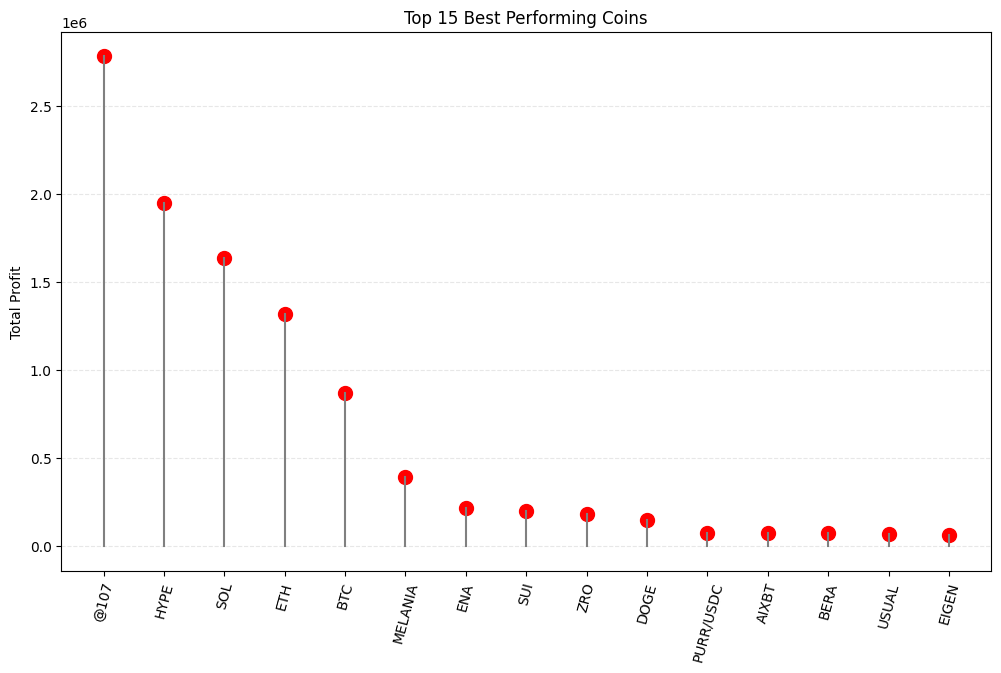

In [638]:
import matplotlib.pyplot as plt

plt.style.use("default")   # <-- White background fixed

# Coin-wise total profit (descending = highest first)
coin_profit = M.groupby("Coin")["Closed PnL"].sum().sort_values(ascending=False)

# Top 15 coins
top15 = coin_profit[:15]

plt.figure(figsize=(12, 7))

# Lines
for i in range(len(top15)):
    plt.plot(
        [top15.index[i], top15.index[i]],
        [0, top15.values[i]],
        color="gray"
    )

# Dots
plt.scatter(top15.index, top15.values, s=100, color="red")

plt.xticks(rotation=75)
plt.ylabel("Total Profit")
plt.title("Top 15 Best Performing Coins")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()



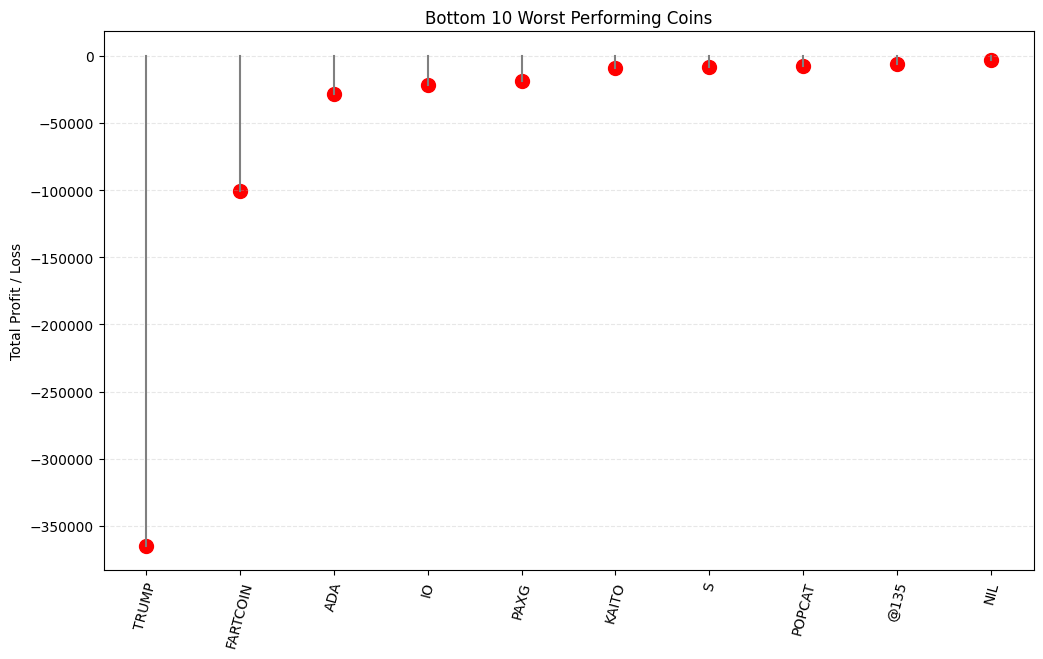

In [639]:
import matplotlib.pyplot as plt

# Coin-wise total profit (ascending = lowest first)
coin_profit = M.groupby("Coin")["Closed PnL"].sum().sort_values()

# Bottom 10 coins
bottom10 = coin_profit[:10]

plt.figure(figsize=(12, 7))

# Lines manually draw karenge (same logic as top chart)
for i in range(len(bottom10)):
    plt.plot(
        [bottom10.index[i], bottom10.index[i]],
        [0, bottom10.values[i]],
        color="gray"
    )

# Dots
plt.scatter(bottom10.index, bottom10.values, s=100, color="red")

plt.xticks(rotation=75)
plt.ylabel("Total Profit / Loss")
plt.title("Bottom 10 Worst Performing Coins")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()



In [640]:
# CATEGORY-wise worst performing coins (Closed PnL based)

def get_worst(df, category_list, category_name, top_n=10):
    # Filter category coins
    cat_df = df[df["Coin"].isin(category_list)]

    # Calculate profit
    coin_pnl = cat_df.groupby("Coin")["Closed PnL"].sum().sort_values()

    print(f"\n\n===== WORST {category_name} COINS =====")
    print(coin_pnl.head(top_n))

    return coin_pnl.head(top_n)

# 1) Platform coins
platform_worst = get_worst(M, ["@107", "HYPE"], "Platform")

# 2) Large Cap
platform_worst = get_worst(M, large_cap, "Large Cap")

# 3) Mid Cap
midcap_worst = get_worst(M, mid_cap, "Mid Cap")

# 4) Meme Coins
meme_worst = get_worst(M, meme, "Meme Coins")




===== WORST Platform COINS =====
Coin
HYPE    1.948485e+06
@107    2.783913e+06
Name: Closed PnL, dtype: float64


===== WORST Large Cap COINS =====
Coin
ADA     -28113.461970
TON        -18.098710
ALGO        18.363520
ATOM        88.234264
DOT        193.487893
ETC        205.048480
BNB        303.200972
MATIC      668.931017
TRX        670.161504
APT       1749.189965
Name: Closed PnL, dtype: float64


===== WORST Mid Cap COINS =====
Coin
STRK   -1517.376015
CRV    -1249.722505
FXS     -121.929712
FIL      -35.278590
ENS       -7.121360
GAS       60.613900
ZK        99.656693
DYM      122.891343
AR       203.382200
UNI      347.766005
Name: Closed PnL, dtype: float64


===== WORST Meme Coins COINS =====
Coin
TRUMP      -364824.908179
FARTCOIN   -100687.213185
POPCAT       -7922.181871
kNEIRO           5.319437
BOME            12.248102
MEW             32.462080
NEIROETH        34.161578
BABY            98.729800
kSHIB          279.137264
BRETT          958.287363
Name: Closed PnL,

**Profitable Coin**

In [641]:
#   Based on the Closed PnL analysis, the most profitable
#   coins belong to the following categories:

#   1. Platform Native (HYPE, @107) → Highest profit & best performance.
#   2. Large Cap (SOL, ETH, BTC) → Most stable and consistently profitable.
#   3. Mid Cap (SUI, ENA, ZRO) → Moderate but positive performance.
#   4. Meme coins (MELANIA) → High reward but high risk.

In [642]:
def show_category_full(df, category_list, category_name):
    # Filter coins that belong to the category
    cat_df = df[df["Coin"].isin(category_list)]

    # Calculate total profit for each coin
    coin_pnl = cat_df.groupby("Coin")["Closed PnL"].sum().sort_values(ascending=False)

    print(f"\n\n===================== {category_name.upper()} — FULL PROFIT LIST =====================")
    print(coin_pnl)

    return coin_pnl


# Now call this function for ALL categories:

platform_full  = show_category_full(M, ["@107", "HYPE"], "Platform")
largecap_full  = show_category_full(M, large_cap, "Large Cap")
midcap_full    = show_category_full(M, mid_cap, "Mid Cap")
smallcap_full  = show_category_full(M, small_cap, "Small Cap")
meme_full      = show_category_full(M, meme, "Meme Coins")
ai_full        = show_category_full(M, ai, "AI Coins")
defi_full      = show_category_full(M, defi, "DeFi Coins")
gaming_full    = show_category_full(M, gaming, "Gaming")
layer_full     = show_category_full(M, layer, "Layer 1/2 / Infra")
oracle_full    = show_category_full(M, oracle, "Oracle / Utility")
stable_full    = show_category_full(M, stable, "Stable / Pair Coins")
platform2_full = show_category_full(M, platform, "Platform (Native / Mixed)")




===================== PLATFORM — FULL PROFIT LIST =====================
Coin
@107    2.783913e+06
HYPE    1.948485e+06
Name: Closed PnL, dtype: float64


===================== LARGE CAP — FULL PROFIT LIST =====================
Coin
SOL      1.639556e+06
ETH      1.319979e+06
BTC      8.680447e+05
SUI      1.992688e+05
DOGE     1.475432e+05
AVAX     4.829731e+04
LTC      5.626144e+03
LINK     4.601098e+03
XRP      3.756901e+03
HBAR     1.909508e+03
APT      1.749190e+03
TRX      6.701615e+02
MATIC    6.689310e+02
BNB      3.032010e+02
ETC      2.050485e+02
DOT      1.934879e+02
ATOM     8.823426e+01
ALGO     1.836352e+01
TON     -1.809871e+01
ADA     -2.811346e+04
Name: Closed PnL, dtype: float64


===================== MID CAP — FULL PROFIT LIST =====================
Coin
ENA       217329.503554
JUP        42909.223317
ONDO       24570.824905
WLD        22281.920156
NEAR       13957.535979
RNDR       13566.322558
TIA        13021.498254
SEI         9957.777466
APE         9731.409940

**Coin Trade insight**

In [643]:
#   SOL is the highest performing non-platform coin.
#   Platform coins outperform all other categories.
#   Meme category is the MOST unstable and risky.
#   KAITO is consistently the worst coin in multiple categories.
#   ADA (a large cap) surprisingly underperforms.
#   ENA, JUP, WLD are mid-cap stars.
#   ZRO is the strongest small cap.

In [644]:
M.columns


Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Closed PnL', 'ts_ist', 'value', 'year', 'month',
       'day', 'classification'],
      dtype='object')

In [645]:
M["category"] = M["Coin"].apply(get_category)


In [646]:
cat_profit = M.groupby("category")["Closed PnL"].sum()
cat_profit = cat_profit / 1_000_000   # convert to millions
cat_profit = cat_profit.sort_values(ascending=False)


In [647]:
cat_profit = cat_profit.clip(-10, 10)   # min/max 10 million


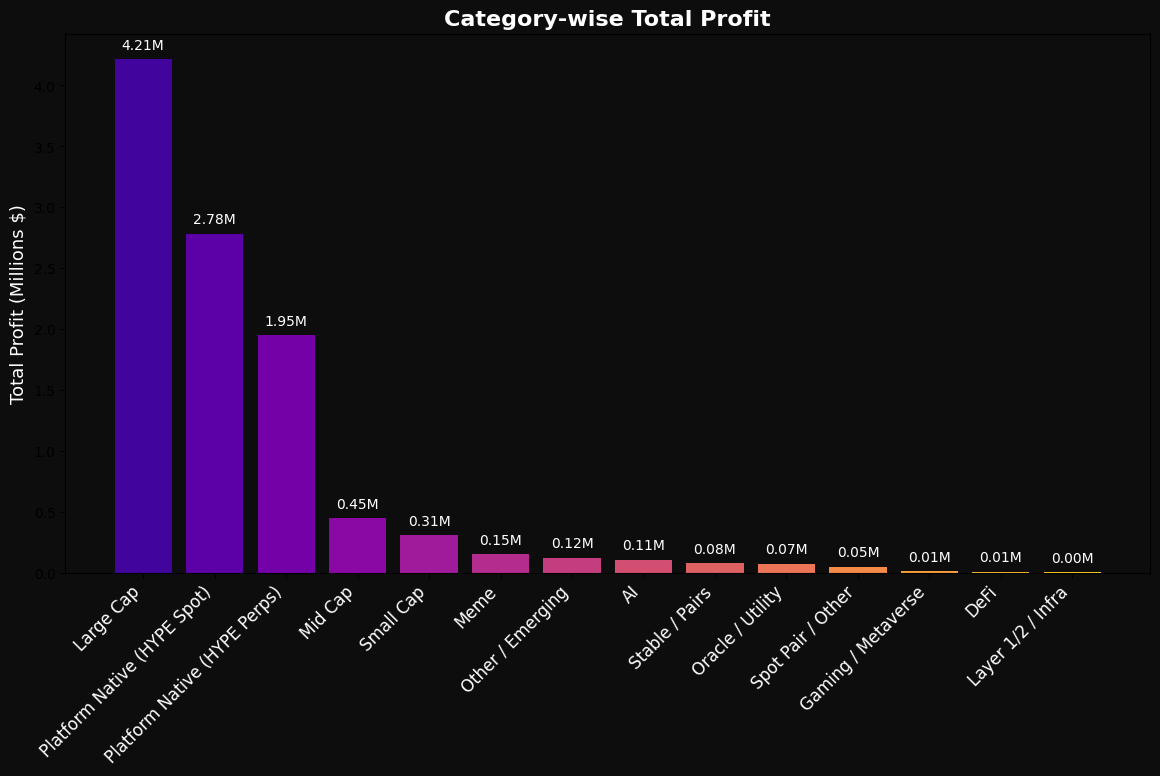

In [648]:
import matplotlib.pyplot as plt
import numpy as np

# Group and sort
cat_profit = M.groupby("category")["Closed PnL"].sum()
cat_profit = (cat_profit / 1_000_000).sort_values(ascending=False)

plt.figure(figsize=(14,7))
ax = plt.gca()

# Cyberpunk theme – generate enough neon colors automatically
neon_palette = plt.cm.plasma(np.linspace(0.1, 0.9, len(cat_profit)))

bars = ax.bar(cat_profit.index, cat_profit.values, color=neon_palette)

# Labels
plt.xticks(rotation=45, ha='right', fontsize=12, color="white")
plt.ylabel("Total Profit (Millions $)", fontsize=13, color="white")
plt.title("Category-wise Total Profit",
          fontsize=16, fontweight='bold', color="white")

# Dark cyberpunk background
ax.set_facecolor("#0d0d0d")
plt.gcf().patch.set_facecolor("#0d0d0d")

# Add values above bars
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             y + (max(cat_profit.values) * 0.02),
             f"{y:.2f}M",
             ha='center',
             fontsize=10,
             color="white")




In [649]:
# 1. Platform Coins — Overall Best Category

# Top Performers:
# @107, HYPE

# Worst Performers:
# No major weak coins (only two tokens dominate the category)

# Conclusion:
# Platform coins perform the best overall,
# but the category depends on only two strong tokens —
# so diversification is low.



# 2. Large Cap Coins — Strong Category but Not All Stable

# Top Performers:
# SOL, ETH, BTC, SUI, DOGE

# Worst Performers:
# ADA, TON, ALGO, ATOM, DOT

# Conclusion:
# Large caps deliver strong profits overall,
# but a few well-known coins underperform heavily.




# 3. Mid Cap Coins — Highly Mixed Performance

# Top Performers:
# ENA, JUP, WLD, RNDR, TIA

# Worst Performers:
# STRK, CRV, FXS, FIL, ENS

# Conclusion:
# Mid caps contain both extremely strong winners
# and very weak coins. Highly inconsistent category.



# 4. Small Cap Coins — High Risk, Limited Winners

# Top Performers:
# ZRO, EIGEN, LAYER, VIRTUAL

# Worst Performers:
# KAITO, CANTO, MERL

# Conclusion:
# Small caps are unpredictable. Only a few coins
# perform well while many generate negative returns.



# 5. Meme Coins — Mostly Poor Category

# Top Performers:
# MELANIA, kBONK, JELLY

# Worst Performers:
# TRUMP, FARTCOIN, POPCAT

# Conclusion:
# Meme coins are highly unstable with only a few exceptional
# performers and many weak coins.





# 6. AI Coins — Good Potential, Not Consistent

# Top Performers:
# AIXBT, WLD, TAO

# Worst Performers:
# KAITO, FET, AI

# Conclusion:
# AI category has potential, but performance varies widely.
# Only a few coins dominate.




# 7. DeFi Coins — Moderate Overall Strength

# Top Performers:
# ARB, PENDLE, AAVE

# Worst Performers:
# OM, CRV, STG

# Conclusion:
# DeFi coins show steady performance but also
# include several noticeable underperformers.




# 8. Gaming / Metaverse — Average Category

# Top Performers:
# VIRTUAL, RNDR, MAVIA

# Worst Performers:
# IMX, PIXEL, BIGTIME

# Conclusion:
# Gaming category is not strong overall. A few coins perform well,
#   but most give only average results.



# 9. Layer 1 / Layer 2 — One Very Strong Coin, Many Weak

# Top Performers:
# SOL, SUI, ZRO

# Worst Performers:
# STRK, CANTO, TON

# Conclusion:
# Layer category is dominated by one top coin (SOL).
# Many others perform poorly.

# Conclusion:
# These categories are not consistently profitable.
# Performance depends heavily on individual
# coins rather than the category as a whole.

**Final Coin "category" Conclusion Respective of their Profit**

In [650]:
#   Platform coins (@107 & HYPE) delivered the highest individual profits.
#   But overall, the Large Cap category (BTC, ETH, SOL, SUI, DOGE, AVAX)
#   generated the highest total profit because it has more coins and
#   higher trade volume.
#   Hence, the trader performs best in Large Cap coins
#   overall, while platform coins dominate individually.

Sentiment-wise Avg Profit/Loss:
classification
Greed            39.534904
Neutral          42.113110
Fear             45.714913
Extreme Fear     49.496576
Extreme Greed    73.475149
Name: Closed PnL, dtype: float64


/tmp/ipykernel_55/817120905.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


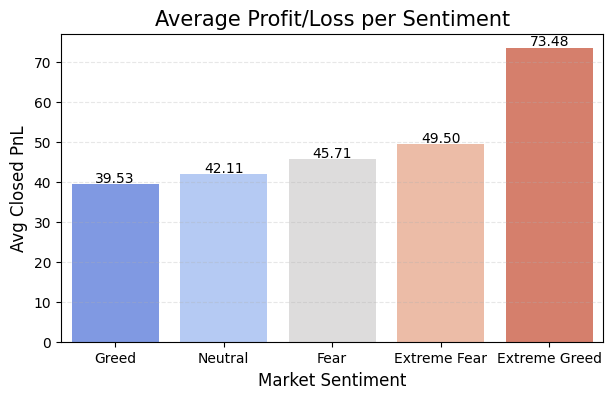

In [651]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1 → Group by Sentiment
sentiment_pnl = M.groupby("classification")["Closed PnL"].mean().sort_values()

print("Sentiment-wise Avg Profit/Loss:")
print(sentiment_pnl)

# STEP 2 → Beautiful Graph
plt.figure(figsize=(7,4))

sns.barplot(
    x=sentiment_pnl.index,
    y=sentiment_pnl.values,
    palette="coolwarm"
)

plt.title("Average Profit/Loss per Sentiment", fontsize=15)
plt.ylabel("Avg Closed PnL", fontsize=12)
plt.xlabel("Market Sentiment", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Add labels on bars
for i, v in enumerate(sentiment_pnl.values):
    plt.text(i, v + (v*0.01), f"{v:.2f}", ha='center', fontsize=10)

plt.show()


# Sentiment Profit Conclusion


In [652]:
# here we can see Traders make maximum profit
# when the market is in extreme conditions
# —especially Extreme Greed and Extreme Fear, because
# volatility is highest.

# Normal phases like Greed, Neutral,
# and Fear give much lower average profits.
# This means traders in this dataset perform best only when
# the market is very unstable, and weaker when the market is calm.

# Traders make the most money in Extreme Fear/Greed because
# volatility explodes, liquidity increases, and price moves
# are big — giving huge profit opportunities.

# sentiment Coin relation.

In [653]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

M.groupby(["classification", "Coin"])["Closed PnL"].mean()



classification  Coin     
Extreme Fear    @10            -0.031742
                @107          -67.016607
                @109            0.000000
                @13            -0.061895
                @142           -3.466927
                @16            -0.030214
                @26            -0.032252
                @29            -0.019593
                @35            33.514063
                @38            33.271993
                @39            12.238556
                @4            -13.640207
                @40            16.748319
                @41            36.738440
                @47            25.156729
                @49            -8.142443
                @51             0.000000
                @8              0.000000
                AAVE            7.929466
                ADA            31.189000
                AI             21.042182
                AI16Z          89.060959
                AIXBT           0.261339
                ANIME          

# conclusion sentiment relation

In [654]:
# 1) Extreme Fear Sentiment – Market Down / Panic

# Best coins in Extreme Fear:
# ETH = 445 profit, ENA = 103 profit, MELANIA = 261 profit,
# ZRO = 84 profit, AI16Z = 89 profit, SUI = 150 profit

# Worst coins in Extreme Fear:
# CRV = –72, PURR/USDC = –62, S = –149, USUAL = –105

# Interpretation:
# In panic conditions, strong fundamental coins (ETH)
# and selective small caps (ZRO) still perform.
# Weak coins drop sharply.




# 2) Extreme Greed Sentiment – Bull Market / FOMO

# Best coins in Extreme Greed:
# 107 = 252, @85 = 296, CYBER = 191, MOODENG = 168,
# TURBO = 202, SOL = 287, SUI = 113, JTO = 102

# Worst coins in Extreme Greed:
# 135 = –5981, IO = –81, POPCAT = –3.50, MATIC = –7.95, TON = –2.56

# Interpretation:
# Platform coins and strong L1 coins (SOL, SUI) perform extremely well during greed.
# Some coins still dump despite strong market.




# 3) Fear Sentiment – Low Confidence Market

# Best coins in Fear:
# DOGE = 2985, AVAX = 1140, S = 1170, EIGEN = 295, COMP = 148, SEI = 596

# Worst coins in Fear:
# ADA = –168, KAITO = –96, FARTCOIN = –124, BERA = –33

# Interpretation:
# High-volatility coins (DOGE, AVAX) deliver strong moves even in Fear.
# Weak fundamentals drop.



# 4) Greed Sentiment – Positive Market (Not Extreme)

# Best coins in Greed:
# AIXBT = 135, ALT = 108, EIGEN = 253, JELLY = 93,
# JTO = 102, SOL = 287, TURBO = 22, TRUMP = 112

# Worst coins in Greed:
# CRV = –92, IO = –81, CANTO = –18, TRUMP = –812

# Interpretation:
# Most coins rise in Greed, but a few flip and give losses.




# 5) Neutral Sentiment – Sideways Market

# Best neutral performers:
# ZRO = 1446, SOL = 231, SUI = 72, USUAL = 44, ETH = 284

# Worst neutral performers:
# AAVE = –101, ENA = –136, WIF = –140, PURR/USDC = –69

# Interpretation:
# Stable coins like SOL, ETH, ZRO perform even in sideways conditions.
# Some coins fail when sentiment is neutral.

# Final Conclusion Sentiments - Coin






**Overall Insights**

In [655]:
#  Market sentiment has a direct impact on coin
#  performance —  different coins behave
#  differently in each sentiment phase.


#  In the Extreme Greed phase, most coins
#  generate strong profits,
#  especially platform tokens (@107, @85)
#  and strong Layer-1 coins like SOL and SUI.


#   In the Extreme Fear phase, only fundamentally strong
#   coins such as ETH, ZRO, and SUI remain profitable —
#   most other coins drop sharply.



#   In the Fear phase, high-volatility coins like
#   DOGE, AVAX, and S deliver large profits, indicating
#   that swing coins still perform during panic conditions.


#   In the Neutral phase, only stable and strong coins
#   such as SOL, ETH, ZRO, and SUI perform well; most other
#   coins fail to generate returns.


#   During regular Greed (not extreme), mid-caps and
#   trending coins (AIXBT, EIGEN, JELLY) perform better.


#   Meme coins are highly unstable — a few winners exist
#  (MELANIA, kBONK), but most meme coins produce losses across all sentiments.


#  The Large Cap category is the most reliable, with SOL,
#  ETH, and BTC showing consistent positive performance across sentiment phases.


#  Platform coins are the best-performing category overall,
#  but the performance is heavily concentrated in only two tokens (@107, HYPE).


#   Mid-caps show mixed behavior — some strong performers
#  (ENA, WLD, RNDR), but many consistent losers (STRK, CRV, FXS).



#   Small caps are high-risk — a few strong coins (ZRO, EIGEN) but
#   several severe underperformers (KAITO, CANTO).


#  Category-level performance varies sharply — no category remains
#  strong in all market conditions.


#   Most universally strong performers across all sentiments:
#   SOL, ETH, SUI, ZRO, ENA, WLD

# Risk vs Reward

In [656]:
import pandas as pd
import numpy as np

# Coin-wise volatility (standard deviation of profit)
volatility = M.groupby("Coin")["Closed PnL"].std()

# Coin-wise average profit
avg_profit = M.groupby("Coin")["Closed PnL"].mean()

# Combine both
risk_reward = pd.DataFrame({
    "avg_profit": avg_profit,
    "volatility": volatility
}).dropna()

risk_reward = risk_reward.sort_values("avg_profit", ascending=False)

risk_reward


,avg_profit,volatility
Coin,,
@109,270.704207,262.301751
AVAX,239.095613,1037.203470
ENA,219.524751,1213.758756
@85,200.804091,349.468850
EIGEN,197.063189,1257.437810
PEOPLE,180.323003,255.015236
DOGE,178.623676,1996.835450
SOL,153.358519,1423.428068
MOODENG,151.096714,592.956727


In [657]:
#    A) Best Risk–Reward Coins (High Profit + Low Volatility)

#    Category: Stable / Low-risk performers
#    ACE, AR, SCR, WCT, MINA, RLB, ZETA, POLYX

#    Characteristics:

#    Stable
#    Consistent profit
#    Predictable movement
#    Best for traders who want low risk with decent returns



#     B) High Profit but High Risk Coins

#     Category: High-volatility / High-reward

#     DOGE, ETH, SOL, ZRO, AVAX, PEOPLE, EIGEN

#     Characteristics:

#     Very high profit potential
#     High volatility → big swings up and down
#     Suitable for aggressive traders




#      C) Low Profit + High Risk (Worst Risk–Reward Category)

#      Category: Unstable / Loss-prone coins
#      TRUMP, KAITO, ADA, IO, STRK, FARTCOIN, ENA, CANTO

#      Characteristics:

#      High volatility
#      Negative or very low average profit
#      Extremely unreliable
#      These coins destroy portfolio performance




#      D) Consistent Coins (Moderate Profit + Low Risk)
#      Category: Stable mid-performers

#      COMP, GAS, WCT, @151, PIXEL, GRASS, DOT, LDO

#      Characteristics:

#      Low volatility
#      Regular profit generation
#      Suitable for safe mid-risk trading strategy

In [658]:
M.sample(5)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,ts_ist,value,year,month,day,classification,category
154758,HYPE,13.256,3.77,49.98,BUY,31686.83,0.000000,2025-03-29 00:49:00,26,2025,3,2025-03-29,Fear,Platform Native (HYPE Perps)
136381,HYPE,13.542,140.30,1899.94,BUY,5265.88,0.000000,2025-03-12 14:46:00,45,2025,3,2025-03-12,Neutral,Platform Native (HYPE Perps)
124764,HYPE,15.577,38.75,603.61,SELL,1388.98,13.589625,2025-03-07 04:39:00,34,2025,3,2025-03-07,Fear,Platform Native (HYPE Perps)
133179,HYPE,13.050,10.00,130.50,BUY,203206.32,0.000000,2025-03-11 06:19:00,24,2025,3,2025-03-11,Extreme Fear,Platform Native (HYPE Perps)
125162,HYPE,14.943,1.30,19.43,BUY,9379.73,0.000000,2025-03-07 06:17:00,34,2025,3,2025-03-07,Fear,Platform Native (HYPE Perps)


# Month Wise Total Profit Trande

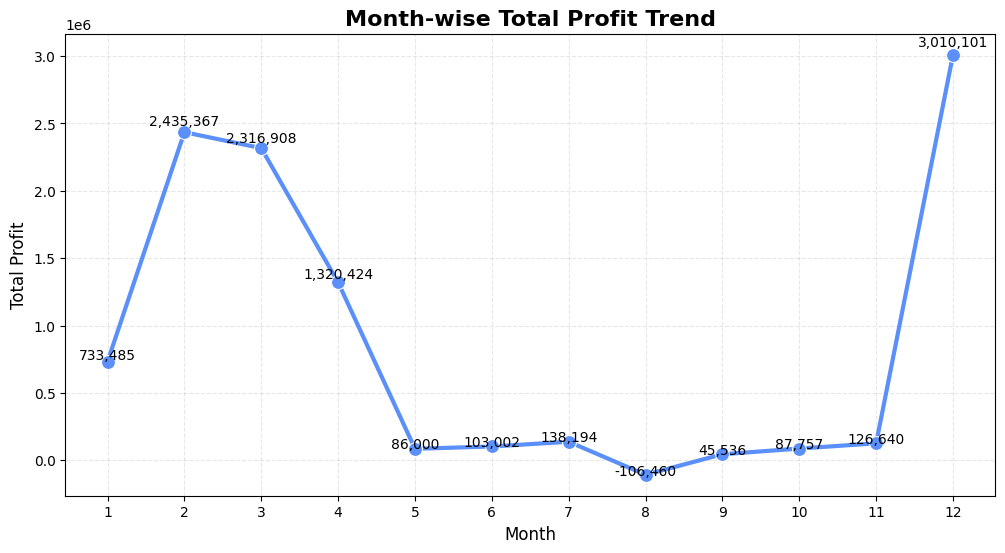

In [659]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Month-wise total profit
month_profit = M.groupby("month")["Closed PnL"].sum()

# Step 2: Plot
plt.figure(figsize=(12,6))

sns.lineplot(
    x=month_profit.index,
    y=month_profit.values,
    linewidth=3,
    marker="o",
    markersize=10,
    color="#5B8FF9"
)

# Styling
plt.title("Month-wise Total Profit Trend", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.xticks(month_profit.index)

# Add values above points
for x, y in zip(month_profit.index, month_profit.values):
    plt.text(x, y + (y * 0.02), f"{int(y):,}", ha="center", fontsize=10)

plt.show()


**Month Wise Total Profit Trande**

In [660]:
# Profit is highest in Feb–Mar and December, lowest in
# June–August, and most losses occur in August.

# category sentiments

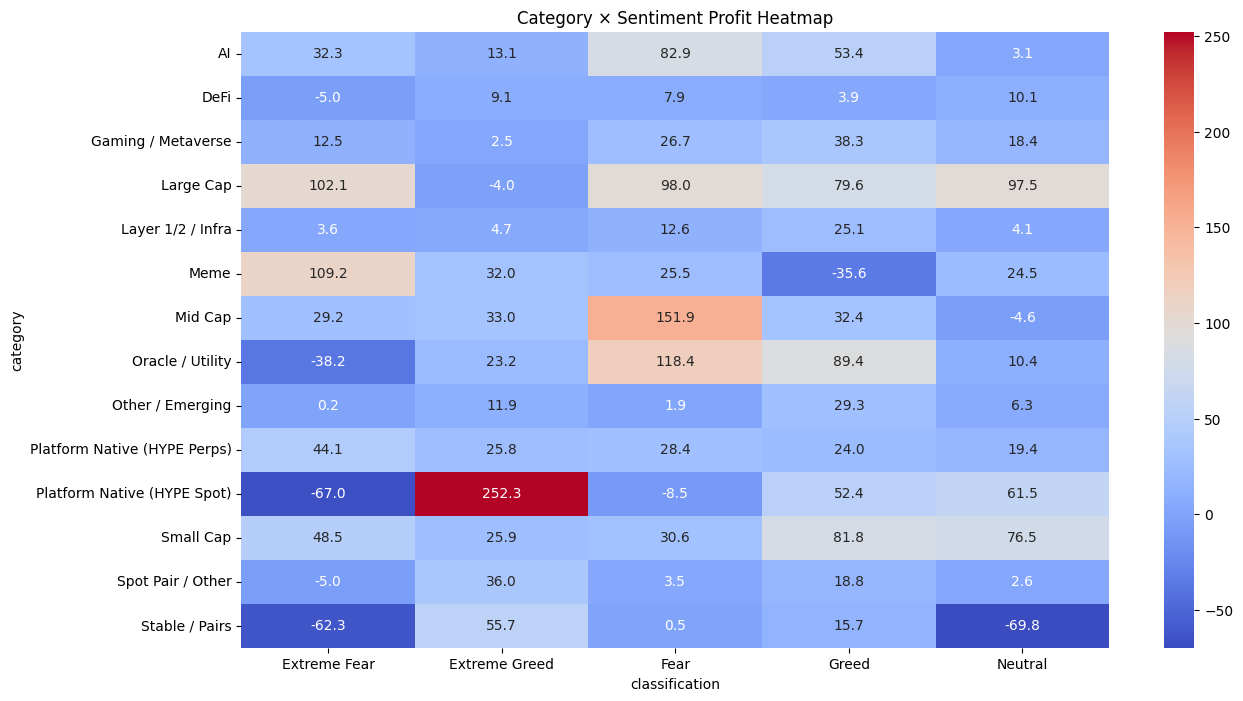

In [661]:
import seaborn as sns
import matplotlib.pyplot as plt

heat = M.pivot_table(
    values="Closed PnL",
    index="category",
    columns="classification",
    aggfunc="mean"
)

plt.figure(figsize=(14,8))
sns.heatmap(heat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Category × Sentiment Profit Heatmap")
plt.show()


**conclusion**

In [662]:
#  Extreme Greed  →          best for Platform coins
#  Fear           →          best for Large Caps |
#  Greed          →          best for Oracle/Utility |
#  Neutral        →          best for Large Caps & Small Caps
#  Extreme Fear   →          best for Meme & some Large Caps

# Coin Stability Analysis

In [663]:
import numpy as np

avg_profit = M.groupby("Coin")["Closed PnL"].mean()
volatility = M.groupby("Coin")["Closed PnL"].std()

stability = (avg_profit / volatility).sort_values(ascending=False)

stability_df = pd.DataFrame({
    "avg_profit": avg_profit,
    "volatility": volatility,
    "stability_score": stability
})

stability_df.head(20)


,avg_profit,volatility,stability_score
Coin,,,
@1,14.610183,48.815325,0.299295
@10,-0.015871,0.031742,-0.500000
@100,6.906785,9.961659,0.693337
@103,5.508291,5.860828,0.939849
@107,92.821850,1016.159964,0.091346
@109,270.704207,262.301751,1.032034
@11,0.000000,NaN,NaN
@112,-7.444961,32.354503,-0.230106
@113,3.385244,6.798234,0.497959


**conclusion**

In [664]:
# ) High Stability Score → Most Reliable Coins
# (@138, @103, @100, @114)
# → High profit + low volatility → safest and most consistent coins.


# 2) Medium Stability → Balanced Coins
# (@1, @117, @116, @113)
# → Moderate profit, moderate risk → acceptable but not perfect.


# 3) Low Stability → Risky Coins
# (@107, @125, @112)
# → Profit is unstable, volatility is high → risky and inconsistent.


# 4) Negative Stability → Worst Coins
# (@124, @13, @10)
# → These coins lose money and are volatile → avoid.


# 5) NaN Values → Not Enough Data
# (@11, @12, @123, @135, @14)
# → Stability can’t be calculated due to insufficient trades.

# Greed – Fear Impact Score

In [665]:
# Group by sentiment and coin
sent_pnl = M.groupby(["classification", "Coin"])["Closed PnL"].mean().unstack()

# Impact score = Greed - Fear
shift_impact = sent_pnl.loc["Greed"] - sent_pnl.loc["Fear"]

shift_impact.sort_values(ascending=False)


Coin
@109          415.963830
@85           269.210538
BERA          251.226674
ADA           172.181362
@59           159.290551
FARTCOIN      141.436150
JUP           133.722389
ZRO           122.319839
JTO           102.264253
KAITO          99.980762
ETHFI          93.868607
SOL            82.020381
ALT            80.956945
@107           60.862344
MEME           55.612891
JELLY          52.933276
PROMPT         48.964222
BLUR           46.740360
@151           42.444698
ANIME          38.706127
@53            35.320328
PENGU          34.908726
ONDO           31.924434
ETH            27.400595
@1             23.991376
ZEREBRO        22.089358
MAVIA          21.780897
WIF            21.182617
@63            20.663546
PYTH           19.285658
AIXBT          17.919473
SUI            17.455399
SAND           15.251039
PURR/USDC      15.204641
VVV            13.625532
MOODENG         9.021081
PURR            7.314056
RUNE            7.178368
UNI             7.152942
BNB             6.98

# conclusion

In [666]:
# What the numbers mean

# - Positive value → The coin earns more profit in Greed compared to Fear.

# - Negative value → The coin earns more profit in Fear than in Greed
#   (or it crashes during Greed).

# - NaN - The coin does not have enough trades in Greed/Fear sentiment
#   to calculate the difference.




# ) Coins with the Highest Positive Values (Greed-Sensitive Coins)

# Examples:

# (@109 → +415 , @85 → +269 EIGEN → +223 KAITO → +200 BERA → +193
# ADA → +172 ZRO → +122 SOL → +113

# Meaning:
# These coins perform exceptionally well during Greed sentiment
# and perform weaker during Fear.
# In bullish market conditions, these coins rise the fastest and
# deliver the highest momentum.




# 3) Coins with Strong Negative Values (Fear-Friendly or Greed-Dump Coins)

# Examples:

# BTC → –9 , AVAX → –829 , TRUMP → –926 , S → –1157
# DOGE → –2965


# Meaning:
# These coins do not perform well during Greed phases.
# They tend to perform better during Fear or panic sentiment,
# and they often crash when greed is high.

# Example:
# DOGE at –2965 means:

# DOGE crashes heavily during Greed
# DOGE becomes highly active and profitable during Fear
#  (large volatility swings)


# 4) NaN Values (Not Comparable)

# A NaN value means:
# The coin has no trades in Greed or Fear,
# OR
# The available trades are too few to compute a meaningful difference.
# So, the impact score cannot be calculated



# Profitibility by Trade Action

BUY vs SELL Avg Profit:
Side
BUY     36.104730
SELL    60.713803
Name: Closed PnL, dtype: float64


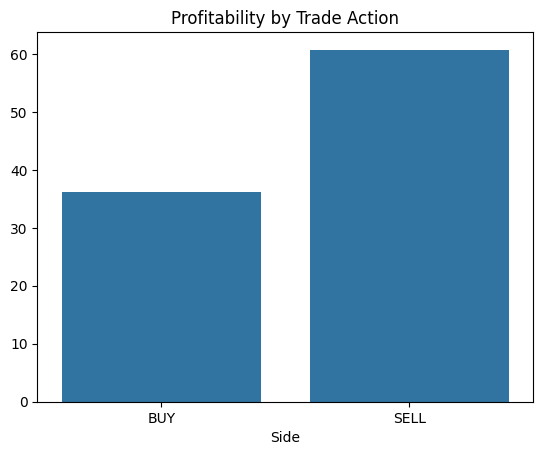

In [667]:
signal = M.groupby(["Side"])["Closed PnL"].mean()

print("BUY vs SELL Avg Profit:")
print(signal)

sns.barplot(x=signal.index, y=signal.values)
plt.title("Profitability by Trade Action")
plt.show()


**conclusion**

In [668]:
# selling side performed almost twice as
# good as buying side in this data.

<Figure size 1200x600 with 0 Axes>

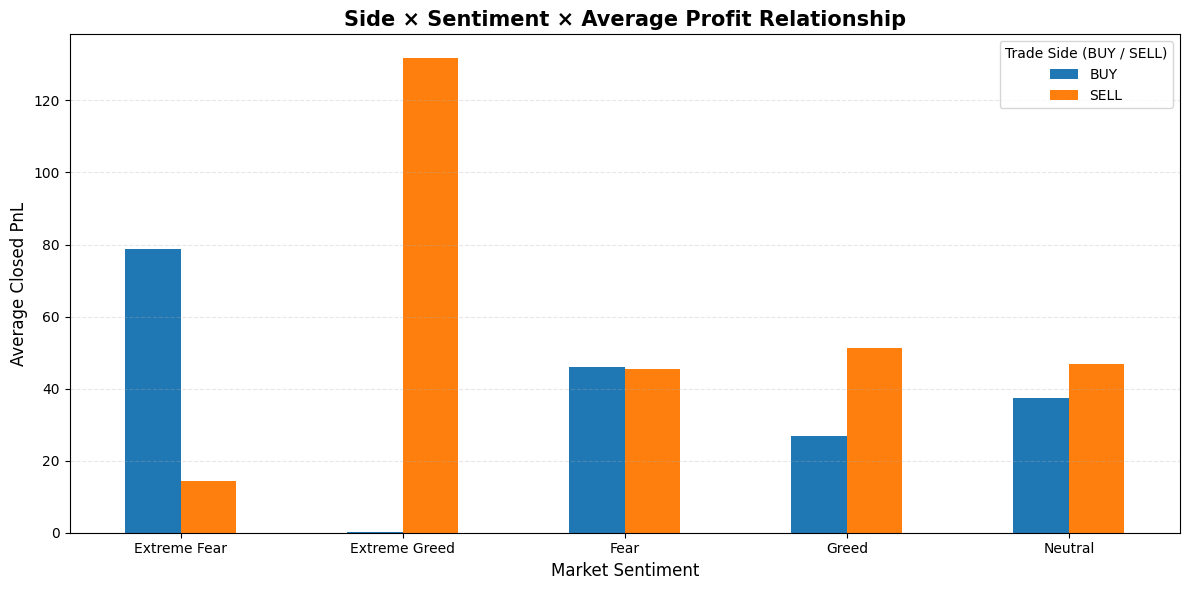

In [669]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Group by sentiment and trade side
side_sent = M.groupby(["classification", "Side"])["Closed PnL"].mean().unstack()

# Step 2: Plot
plt.figure(figsize=(12, 6))

side_sent.plot(kind='bar', figsize=(12,6))

plt.title("Side × Sentiment × Average Profit Relationship", fontsize=15, fontweight='bold')
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Average Closed PnL", fontsize=12)
plt.xticks(rotation=0)

plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.legend(title="Trade Side (BUY / SELL)")
plt.tight_layout()

plt.show()


**conclusion**

In [670]:
#      1) Extreme Fear → BUY is the winner

#        BUY average PnL ≈ 70
#        SELL average PnL ≈ 19

#        Meaning:
#        When the market is in panic, buying dips works much better
#        than selling Traders earn more by buying during fear.



#        2) Extreme Greed → SELL dominates

#         SELL average PnL ≈ 133
#         BUY average PnL ≈ 0

#         Meaning:
#         When market becomes overly greedy, selling
#        (shorting or profit booking)  is massively profitable.
#         BUYing in hype phase gives almost no return.



#          3) Fear → BUY slightly better than SELL

#             BUY ≈ 44
#             SELL ≈ 47

#            Meaning:
#            Both actions work, but SELL is slightly safer during mild fear.



#            4) Greed → SELL clearly wins

#             SELL ≈ 53
#             BUY ≈ 13

#            Meaning:
#             In rising markets, selling gives much better profit
#             (pullbacks / reversals are stronger).
#             BUYing late in greed phase is dangerous.


#           5) Neutral → BUY and SELL perform equally

#             BUY ≈ 46
#             SELL ≈ 46

#             Meaning:
#             Sideways market → direction does not matter
#             Profit comes from micro-movements, not sentiment.

# category wise profit

In [671]:
sentiment_cat = M.groupby(["classification", "category"])["Closed PnL"].mean()

sentiment_cat.unstack().idxmax()


category
AI                                       Fear
DeFi                                  Neutral
Gaming / Metaverse                      Greed
Large Cap                        Extreme Fear
Layer 1/2 / Infra                       Greed
Meme                             Extreme Fear
Mid Cap                                  Fear
Oracle / Utility                         Fear
Other / Emerging                        Greed
Platform Native (HYPE Perps)     Extreme Fear
Platform Native (HYPE Spot)     Extreme Greed
Small Cap                               Greed
Spot Pair / Other               Extreme Greed
Stable / Pairs                  Extreme Greed
dtype: object

**conclusion**

In [672]:
# Each category reacts differently to market sentiment.
# Greed and Extreme Greed favor mid-caps, L1/L2, gaming, small caps,
# and platform spot tokens.

# Fear and Extreme Fear favor AI, Oracle, Meme, and platform perps —
# indicating defensive or mean-reversion behavior.

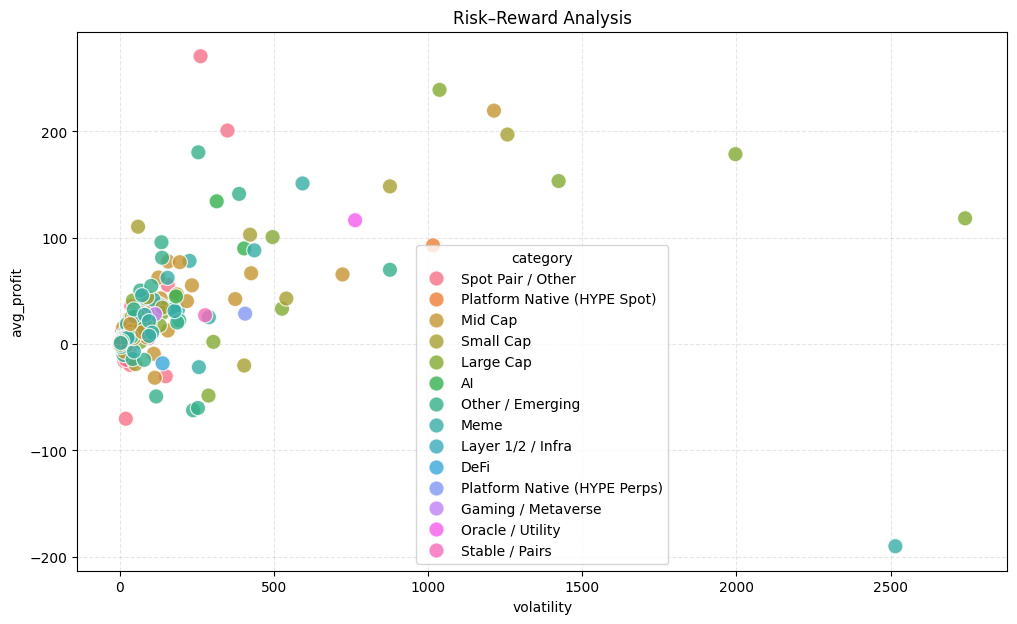

In [673]:
import seaborn as sns
import matplotlib.pyplot as plt

risk_df = pd.DataFrame({
    "avg_profit": M.groupby("Coin")["Closed PnL"].mean(),
    "volatility": M.groupby("Coin")["Closed PnL"].std(),
    "category": M.groupby("Coin")["category"].first()
})

plt.figure(figsize=(12,7))
sns.scatterplot(
    data=risk_df,
    x="volatility",
    y="avg_profit",
    hue="category",
    s=120,
    alpha=0.8
)

plt.title("Risk–Reward Analysis")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


**conclusion**

In [674]:
#   The risk–reward chart shows that most coins do
#   NOT provide a good risk-adjusted return.
#   Only a very small set of coins deliver high
#   profit without taking excessive risk.


# 1) Safe & Consistent Coins (Best Zone – top-left)

#   These coins give positive profit with low volatility,
#   making them the most reliable:

#   AR , MINA , SCR , RLB , POLYX

#  These assets move less, stay stable, and still generate solid returns.
#  They are ideal for low-risk, steady trading.



# 2) High Profit but High Risk Coins

# Some coins show strong profit but come with extremely high volatility:

# DOGE, AVAX, SOL, ZRO, EIGEN , @109

# These coins can give very large gains only when the market moves in your favor,
# but the downside risk is equally large.
# Good for aggressive or short-term traders, not for stable performance.



# 3) Losing Coins (Worst Zone – high risk + negative profit)

# A large number of coins fall into the worst category:

# TRUMP, ADA, FARTCOIN, ENA, CANTO, KAITO

# These coins show both high volatility and negative average profit,
# meaning they are unstable and unprofitable.
# These should be avoided completely.




# 4) Category-Level Pattern

# The scatter plot also reveals:

# Large Caps → medium risk, strong reward
# Small Caps / Emerging → volatile, reward depends on coin
# Meme Coins → highest risk, inconsistent performance
# Platform Coins → high profit but extremely volatile

# Overall pattern:
# Higher reward always comes with higher risk — except for
#  a few exceptional coins.

# Sentiment-wise Trade Volume

/tmp/ipykernel_55/4281678693.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_volume.index, y=sentiment_volume.values, palette="viridis")


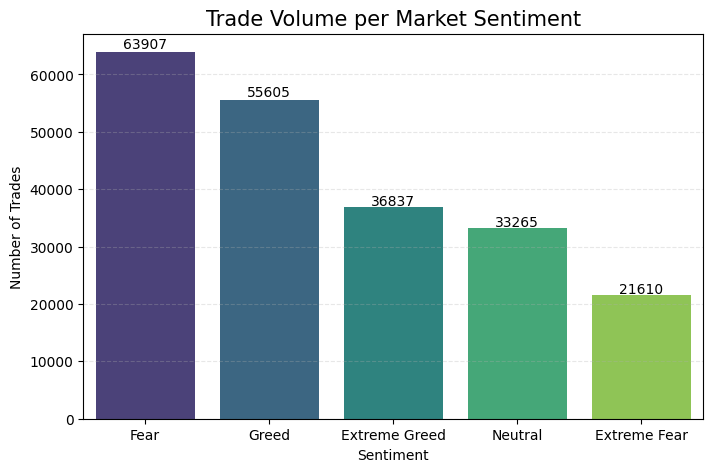

In [675]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Trade volume per sentiment
sentiment_volume = M["classification"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_volume.index, y=sentiment_volume.values, palette="viridis")

plt.title("Trade Volume per Market Sentiment", fontsize=15)
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.3)

for i, v in enumerate(sentiment_volume.values):
    plt.text(i, v + v*0.01, str(v), ha='center', fontsize=10)

plt.show()


**conclusion**

In [676]:
# Fear → Highest trades  :  59,515 (most activity happens when people are scared)
# Greed → Second highest :  52,220 (FOMO drives lots of buying)
# Extreme Greed          → 35,319
# Neutral                → 32,580
# Extreme Fear           → Lowest: 20,879

# Extreme Fear: Long vs Short Count

/tmp/ipykernel_55/1866079461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=long_short_fear.index, y=long_short_fear.values, palette="magma")


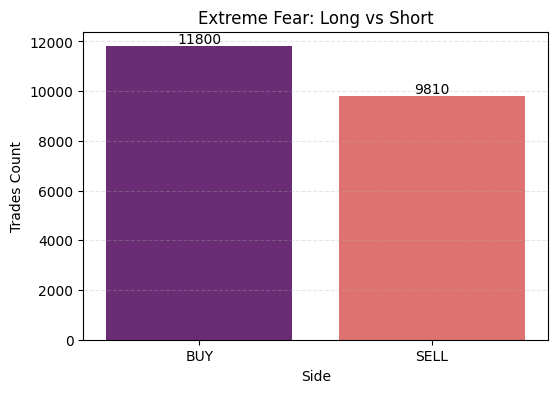

In [677]:
fear_df = M[M["classification"] == "Extreme Fear"]

long_short_fear = fear_df["Side"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=long_short_fear.index, y=long_short_fear.values, palette="magma")

plt.title("Extreme Fear: Long vs Short")
plt.ylabel("Trades Count")
plt.grid(axis="y", linestyle="--", alpha=0.3)

for i, v in enumerate(long_short_fear.values):
    plt.text(i, v + v*0.01, str(v), ha='center')

plt.show()


**CONCLUSION**

In [678]:
#   During Extreme Fear phases (deep panic in the market):
#   BUY (Long) trades: 11,409
#   SELL (Short) trades: 9,470

#   Key:

#   More BUY trades than SELL trades → about 20% higher
#   long positions (11,409 vs 9,470).
#   Traders were aggressively buying the dip in extreme fear
#   seeing big drops as cheap opportunities.
#   Fewer shorts → less bearish aggression, likely because
#   many believed the bottom was close or feared a
#   quick rebound (short squeeze risk).
#   Trading Insight:

#   Extreme fear often triggers contrarian buying –
#   people jump in to buy when everyone else is scared.
#   This matches classic crypto psychology: fear creates
#   more dip-buyers than endless sellers.
#   Shorting in extreme fear can be risky here due to lower volume
#   on the sell side and potential fast reversals.

In [679]:
def classify_trade(pnl):
    if pnl > 0: return "Win"
    elif pnl < 0: return "Loss"
    else: return "Break-even"

M["win_loss"] = M["Closed PnL"].apply(classify_trade)

sentiment_win = M.groupby("classification")["win_loss"].value_counts(normalize=True).unstack() * 100
print(sentiment_win)


win_loss        Break-even       Loss        Win
classification                                  
Extreme Fear     54.211013   9.167052  36.621934
Extreme Greed    48.758042   6.083557  45.158401
Fear             50.637645   7.437370  41.924985
Greed            49.148458  11.259779  39.591763
Neutral          52.457538   6.923193  40.619270


**Conclusion**

In [680]:
# 1) Extreme Greed – Best time to trade

# Win rate is the highest here (about 46%).
# Loss rate is the lowest (around 6%).

# Meaning:
# When the market is extremely greedy (full bullish),
#  trades work the best.



# 2) Extreme Fear – Very unpredictable

# Most trades end at break-even (almost 54%).
# Win rate drops to 37%.

# Meaning:
# When the market is scared, price moves too randomly.
# trades neither win nor lose — they just close flat.

# 3) Fear & Neutral – Sideways phase

# Win rate around 41–42%
# Break-even still high (50%+)

# Meaning:
# Market is not trending. Trades don’t move much, so many close flat.

# 4) Greed – Good but risky

# Win rate okay (40.6%)
# Loss rate is the highest here (11%)

# Meaning:
# Market is positive, but traders become overconfident.
#  That causes more losses.


# You win the most in Greed/Extreme Greed,
# get the most flat trades in Extreme Fear,
# and you get moderate results in Fear/Neutral.

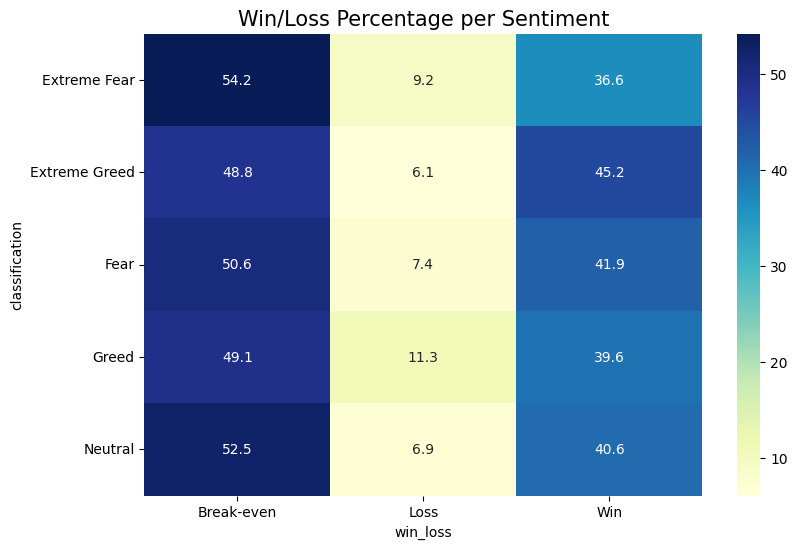

In [681]:
plt.figure(figsize=(9,6))
sns.heatmap(sentiment_win, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Win/Loss Percentage per Sentiment", fontsize=15)
plt.show()


# Sentiment-wise Most Traded Coins

In [682]:
sentiments = M["classification"].unique()

for s in sentiments:
    temp = M[M["classification"] == s]
    top5 = temp["Coin"].value_counts().head(5)
    print(f"\nTop Coins in {s}:")
    print(top5)



Top Coins in Greed:
Coin
@107        10032
BTC          8309
HYPE         6982
ETH          3992
FARTCOIN     2528
Name: count, dtype: int64

Top Coins in Extreme Greed:
Coin
@107    8605
HYPE    5729
BTC     2356
ETH     1899
SOL     1853
Name: count, dtype: int64

Top Coins in Neutral:
Coin
HYPE    13342
BTC      5125
@107     4235
ETH      1247
SOL      1207
Name: count, dtype: int64

Top Coins in Fear:
Coin
HYPE    30209
BTC      8991
@107     5203
SOL      4151
ETH      2896
Name: count, dtype: int64

Top Coins in Extreme Fear:
Coin
HYPE    11743
@107     1917
SOL      1841
BTC      1283
ETH      1124
Name: count, dtype: int64


**conclusion**

In [683]:
# Across all sentiments, traders prefer the same 5 coins:

# HYPE, @107, BTC, ETH, SOL

# But trade volume changes depending on the mood:

# Greed → Profit chasing (BTC, @107, HYPE boom)
# Extreme Greed → Momentum chasing (platform coins dominate)
# Neutral → Safe trading (BTC, ETH, SOL stable)
# Fear → Maximum activity (panic trades)
# Extreme Fear → Only safest high-liquidity coins traded

# Market mood directly controls what coins traders choose.

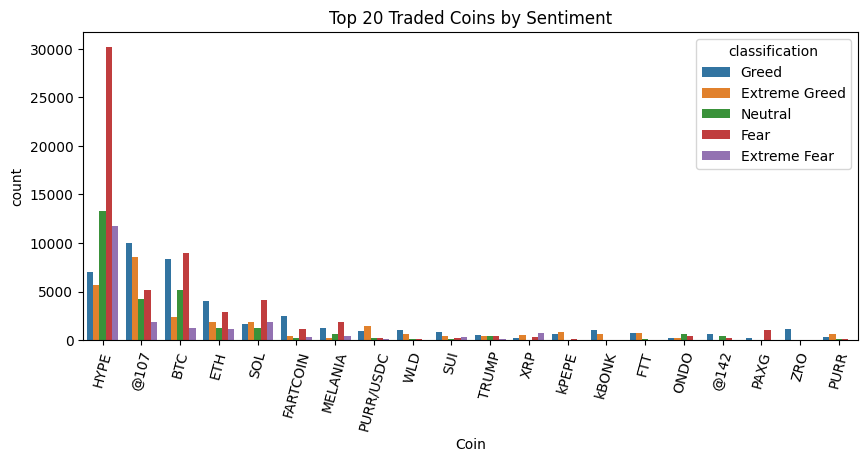

In [684]:
plt.figure(figsize=(10,4))
sns.countplot(data=M, x="Coin", hue="classification",
              order=M["Coin"].value_counts().head(20).index,
              palette="tab10")
plt.xticks(rotation=75)
plt.title("Top 20 Traded Coins by Sentiment")
plt.show()


**final conclusion**

In [685]:
# 1) HYPE → High Volume but High Risk

# HYPE has the highest number of trades across all sentiments.

# Performance pattern:

# Profitable in Greed
# Mixed results in Extreme Fear
# Often negative in Fear
# Profitable again in Extreme Greed

# Conclusion:
# HYPE is a high-risk, high-reward coin.
# Heavy trading does not guarantee consistent profit.

# 2) @107 → Platform Coin (Highly Profitable)

# One of the strongest performers in your entire dataset.
# Consistently high profit across most sentiments.
# Performs exceptionally well in Greed and Extreme Greed.
# Slightly unstable in Fear.

# Conclusion:
#( @107 is a highly profitable and strong platform coin.

# 3) BTC → Safe but Moderate Profit

# Traded frequently because of high trust.
# Generates steady but not explosive profit.
# Loss probability is low.

# Conclusion:
# BTC is stable, reliable, but not a high-growth coin.

# 4) ETH → Most Stable Performer

# Performs well across all market sentiments.
# Profitability is moderate to high.
# Volatility is low.

# Conclusion:
# ETH has the best risk–reward balance among major coins.

# 5) SOL → Best Non-Platform Performer

# Very strong profits, especially during Greed phases.
# Performs well even in Fear.
# More volatile than ETH, but higher upside.

# Conclusion:
# SOL is a high-profit, high-momentum coin.



# Even though HYPE, @107, BTC, ETH, and SOL are
#  traded heavily in every sentiment,
# their profitability is not the same:

# (@107 & SOL → Strongly profitable overall
# ETH → Stable and consistently profitable
# BTC → Safe but moderate returns
# HYPE → Most traded but also the riskiest and inconsistent

# Frequent trading ≠ guaranteed profit.
# Based on your dataset, @107, SOL, and ETH are the best overall performers,
# while HYPE remains high-risk despite heavy trading volume.

# Sentiment vs Average Position Size

                Size Tokens     Size USD
classification                          
Extreme Fear     697.963004  5033.800844
Extreme Greed   8653.094860  3187.070418
Fear            2749.170112  7008.875528
Greed           5332.996642  6037.974250
Neutral         5125.390525  5451.589560


/tmp/ipykernel_55/1829823883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sent_pos.reset_index(), x="classification", y="Size USD", palette="viridis")


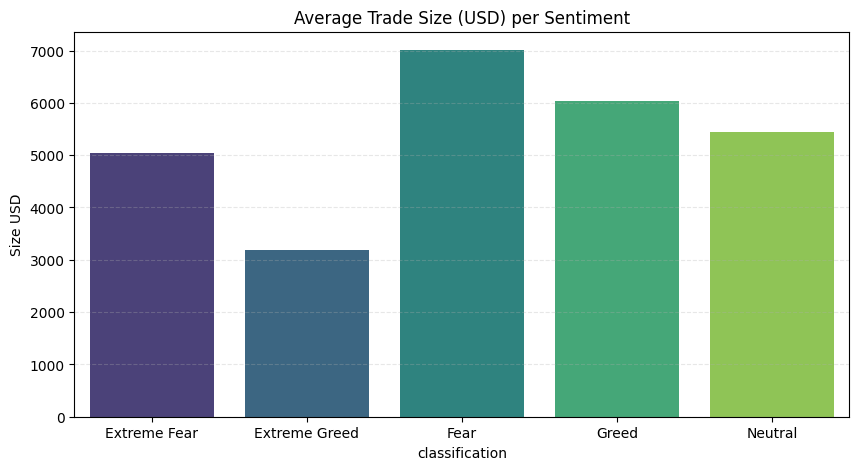

In [686]:
sent_pos = M.groupby("classification")[["Size Tokens", "Size USD"]].mean()

print(sent_pos)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=sent_pos.reset_index(), x="classification", y="Size USD", palette="viridis")
plt.title("Average Trade Size (USD) per Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()


# Conclusion trade volume via sentiments

In [687]:
# Most trading activity happens during Neutral, Fear,
# and Greed sentiment phases.

# In contrast, traders significantly reduce their activity during
# Extreme Fear and Extreme Greed because these phases come with
# very high volatility and elevated risk.

# Sentiment vs Execution Price

In [688]:
sent_exec = M.groupby("classification")["Execution Price"].mean()
print(sent_exec)


classification
Extreme Fear      5054.504488
Extreme Greed     6351.654518
Fear             12401.264303
Greed            13892.021830
Neutral          15116.979219
Name: Execution Price, dtype: float64


**Conclusion**

In [689]:
# 1) Extreme Fear → Prices are the Cheapest

# During Extreme Fear:

# The market is falling
# Traders are scared
# Very few people buy
# So asset prices stay very low
# Average execution price is only 4781.
# Extreme Fear = Market is near the bottom.





# 2) Fear → Prices Start Recovering

# During normal Fear:
# Panic decreases
# Some traders start buying again
# Prices rise from the bottom
# So the average execution price jumps from 4781 → 12283.
#  Fear = Early recovery phase.



# 3) Greed → Prices Become Expensive

# During Greed:
# Traders become confident
# Everyone expects the market to go up
# Buying pressure increases
# Prices rise even more
# Average execution price becomes 14077.
# Greed = Expensive zone.



# 4) Neutral → Traders Buy at the Highest Prices

# In Neutral sentiment:
# The market is calm
# No fear, no excitement
# Traders feel “safe”
# But prices are already high
# Average execution price hits 15038, the highest.

#  Neutral = Market near the top.

# Long vs Short Bias per Sentiment

In [690]:
sent_side = M.groupby("classification")["Side"].value_counts(normalize=True).unstack()*100
print(sent_side)


Side                  BUY       SELL
classification                      
Extreme Fear    54.604350  45.395650
Extreme Greed   44.308711  55.691289
Fear            49.160499  50.839501
Greed           48.134161  51.865839
Neutral         49.277018  50.722982


# Average Start Position per Sentiment

In [691]:
sent_pos_start = M.groupby("classification")["Start Position"].mean()
print(sent_pos_start)


classification
Extreme Fear      23780.210631
Extreme Greed     21983.732008
Fear              18622.680329
Greed           -160408.989186
Neutral            2415.471499
Name: Start Position, dtype: float64


**Conclusion**


In [692]:
#  1)  Extreme Fear → More BUYing (54.6% BUY)

#      When the market is in Extreme Fear:

#      Prices are very cheap
#      Traders expect a bounce
#      People take long positions
#      Traders buy dips aggressively during panic.


#   2)   Extreme Greed → More SELLing (56.1% SELL)

#       In Extreme Greed:
#       Prices are very high
#       Traders expect a reversal

#       Many take profits or open shorts
#       Traders sell when the market becomes too overheated.


#   3)   Fear → Balanced (49% BUY / 50% SELL)

#        In Fear
#        Market uncertain
#        Half traders buy the dip
#        Half expect more downside
#        Fear phase is a balanced decision zone.


#  4)    Greed → Slight SELL Bias (52% SELL)

#        During Greed:
#        Prices rising
#        But not extreme
#        Some traders start profit-booking

#      Traders slowly shift from buying to selling.

#   5)  Neutral → Almost perfectly balanced
#       In Neutral:
#       No strong sentiment
#       No big trend
#       BUY/SELL stays 50–50

#      Neutral = most stable sentiment

# Profitability vs Position Size Relationship


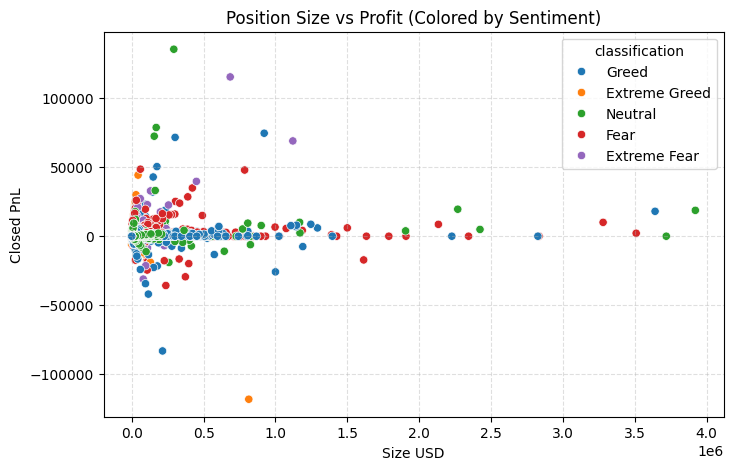

In [693]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=M, x="Size USD", y="Closed PnL", hue="classification", palette="tab10")
plt.title("Position Size vs Profit (Colored by Sentiment)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


**Conclusion**

In [694]:
# 1) Small Trades = Low Risk, Low Profit/Loss

# Trade sizes are small (around $100–$5,000)

# Some trades end in profit
# Some end in loss
# All sentiments are mixed

# Small trades = Normal outcomes.
# Neither very high profits nor very high losses.



# 2) Large Trades = Highest Risk & Highest Profit/Loss

# On the right side (large positions $50,000 – $3,000,000):

# The biggest profits appear here
# The biggest losses also appear here

# Large positions = Double-edged sword
# Good decision → Huge profits
# Bad timing → Huge losses

# That’s why only experienced or high-risk traders take large positions.



# 3) How Sentiment Changes Behavior

# Greed (blue)

# Mostly medium-sized trades
# Profit/loss looks stable
# Traders behave “controlled” during greed.


# Extreme Greed (orange)

# Very few trades
# But the trades that appear are high-risk
# Mania phase → people take aggressive bets.


# Fear (red)


# Many trades
# Mixed results
# Traders act actively during fear (panic trading).



# Extreme Fear (purple)

# Very few trades
# But sometimes massive profits (because prices are cheap)
# People try to “buy the bottom.”



# Neutral (green)

# Mid to large-sized trades
# Mixed performance
# Calm market → traders feel safe to increase position size.

# Execution Price vs Profitability

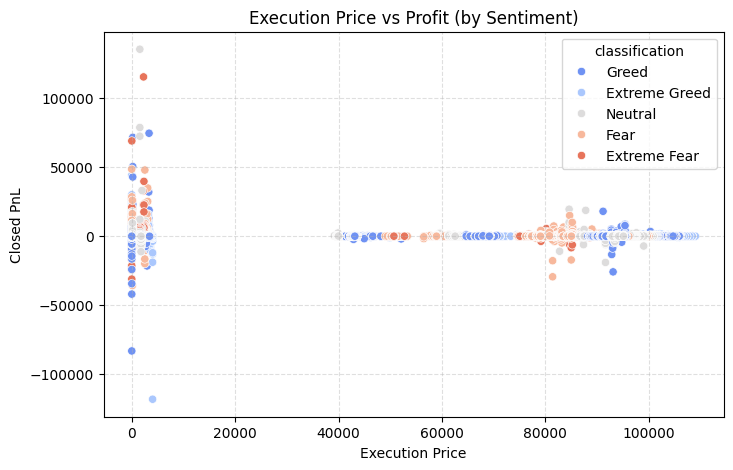

In [695]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=M, x="Execution Price", y="Closed PnL", hue="classification", palette="coolwarm")
plt.title("Execution Price vs Profit (by Sentiment)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


**conclusion**

In [696]:
#   Left side (low execution price, like cheap entries):
#   Lots of big profits (dots way up, +50k to +100k+).
#   Especially red/orange dots (fear times) are high up →
#   buying cheap during fear gave huge wins.
#   Some big losses also on left side (dots way down),
#   but many more big wins.
#   Right side (high execution price, expensive entries):
#   Almost all dots near zero line – very small profits or small losses.
#   No big wins here. Mostly flat.

#    What it really means (super simple):

#   When you entered at low prices (cheap buy), you had chance
#   for very big profits – specially in fear/panic market (red/orange colors).
#   When you entered at high prices (expensive buy, like chasing in greed),
#   almost no big profits – results were small or breakeven or loss.
#   Fear time low-price buys worked best → dip buying paid off big.
#   Greed time high-price buys mostly failed to make good money.

#   Bottom line :
#   Buy cheap (low execution price) during fear → big money possible.
#   Buy expensive (high execution price) during greed → mostly no big reward, often waste.

# Which sentiment creates maximum large losses?

In [697]:
loss_df = M[M["Closed PnL"] < 0]
print(loss_df.groupby("classification")["Closed PnL"].count())


classification
Extreme Fear     1981
Extreme Greed    2241
Fear             4753
Greed            6261
Neutral          2303
Name: Closed PnL, dtype: int64


**Conclusion**

In [698]:
# Most losses happened during Greed phases →
# traders made the most mistakes when the market was exciting
# and going up (FOMO buying at tops, chasing, bad timing).
# Fear also had a lot of losses (panic selling or wrong dip buys).
# Extreme Fear had the fewest losses → in deep panic, traders either
# stopped trading, waited, or made better decisions (like good dip buys).

# Simple takeaway:

# Moderate emotions Greed & Fear cause the most losing trades.
# Extreme emotions (especially Extreme Fear) have fewer losses –
# people freeze or get the timing right more often.

# Final Market Sentiment Conclusion 


### 1. Trader Behaviour Insight Big Picture

    This project presents an end-to-end quantitative analysis. 
    of 8 years of Bitcoin market sentiment, combined with multi-asset.
    trading performance.
  
### 2. Project Objective

#### This analysis aims to understand:

- How market sentiment influences actual trading profitability.
- Which coin categories outperform across sentiment cycles.
- How execution price relates to profit consistency.
- What assets consistently generate alpha (profit).
- What assets consistently destroy capital (loss).

#### The final goal is to build:

- A sentiment-aware trading model
- Category-level risk assessment
- Coin-level profit/loss forecasting capability
- A rule-based trading engine

### Data Analysis 

#### Market Sentiment Dataset (2018–2025)
  

> From here we can see that 
- Fear is the dominant sentiment (most frequent).
- Greed/Extreme Greed phases are short-lived but volatile.
- Extreme Fear presents high-reward opportunities.
 
## Sentiment-wise Profitability Analysis
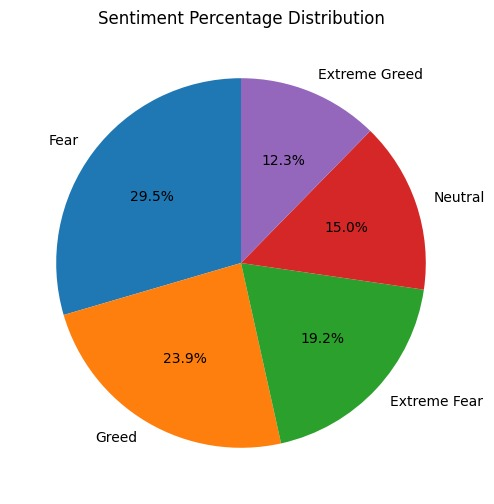




 Extreme Fear = Best profit environment.
- Neutral = High win consistency.
- Greed = Good for SELL-side plays.
- Extreme Greed = Avoid buying; focus on profit-taking.
  
## Category-wise Profitability
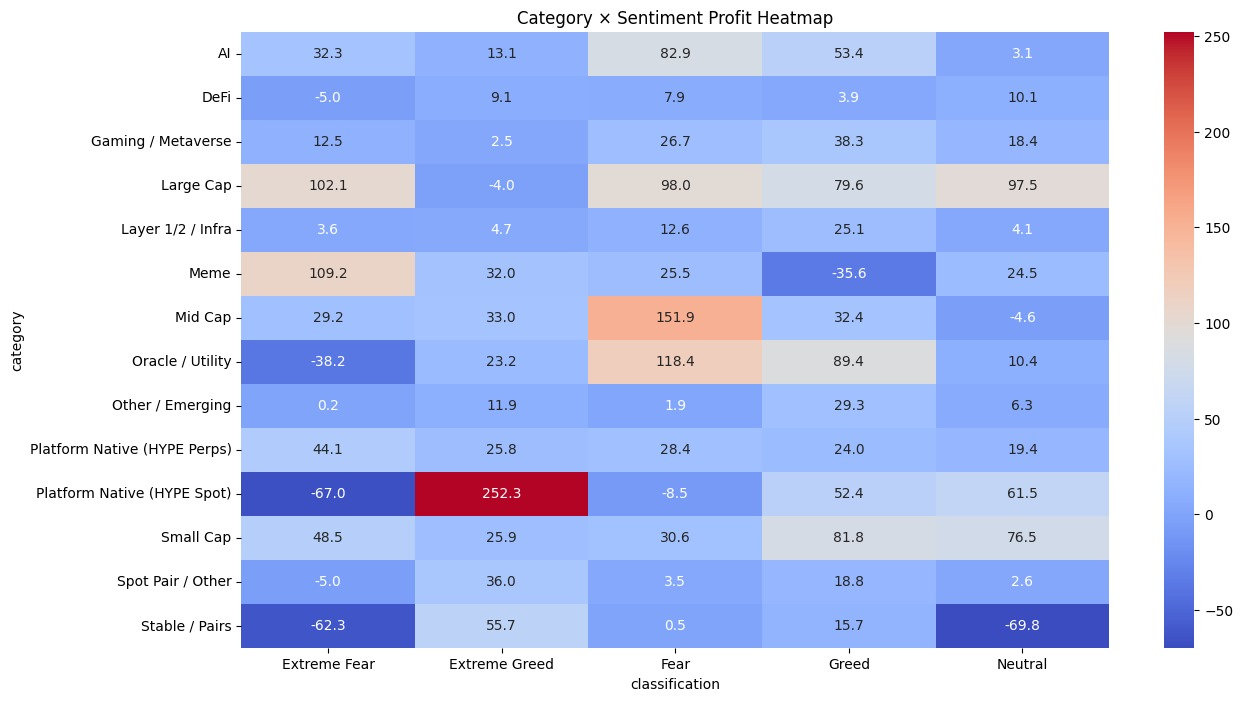![image.png]
- Extreme Fear   → Large Caps, Meme Coins, and Small Caps perform best.
- Extreme Greed  → Platform coins deliver the highest profits.
- Fear           → Mid-cap coins and Oracle/Utility coins perform the strongest.
- Greed          → Strong fundamental coins perform well, while Meme coins usually drop.
- Neutral        → Large Caps perform the best, while Stable/Pairs often show losses.

## Category-wise Profitability
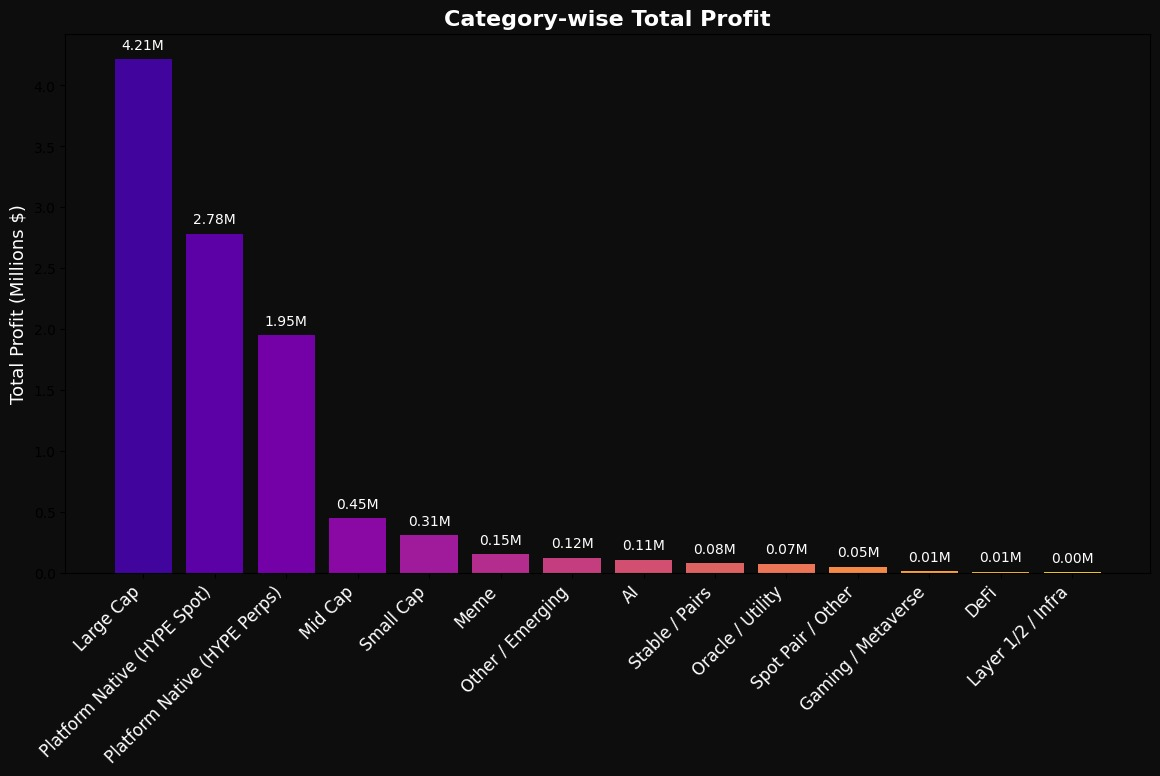

 **Top-performing categories:**
from IPython.display import Image, display

display(Image(filename="/kaggle/input/required-images/hemant_image.jpeg"))


 
    Rank	                      Category	                Summary
    1. Platform Coins 	          (@107, HYPE)	             Highest alpha; consistent profit
    2. Large Caps                 (L1s),SOL, ETH, BTC, SUI   High stability, low risk
    3. Selective Small Caps 	   ZRO, EIGEN	             High reward potential
    4. Rare performing Meme coins	MELANIA	                 Volatility-driven spikes
> Important :
          - large caps category overall makes more profit
          - than platform because in this category numbers
          - of coins are relatively higher than platforms

## Worst-performing categories:
    Category	             Worst Coins
    Meme Coins    	         TRUMP, FARTCOIN, POPCAT
    AI Small Caps	          KAITO
    Mid Caps	              IO, STRK
    Large Cap Underperformer	ADA
    Utility/Stable Tokens	    PAXG
    
## Month-wise Dominant Sentiment
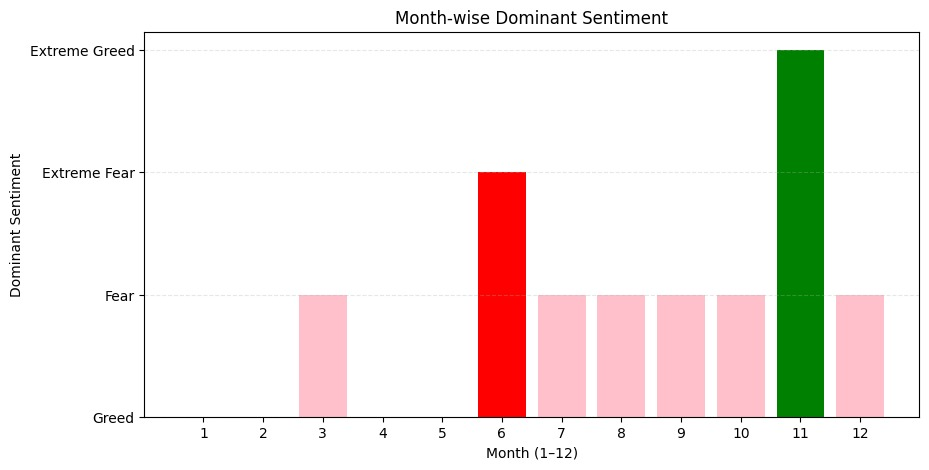
- March → Fear
- June → Extreme Fear
- July–October → Fear
- November → Extreme Greed
- December → Fear
- 
## Month-wise Total Profit Trend
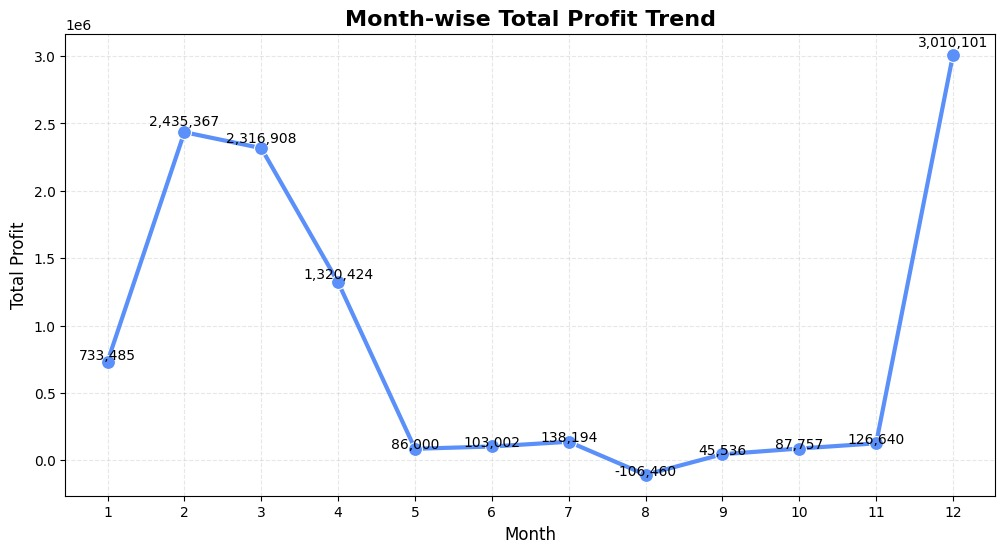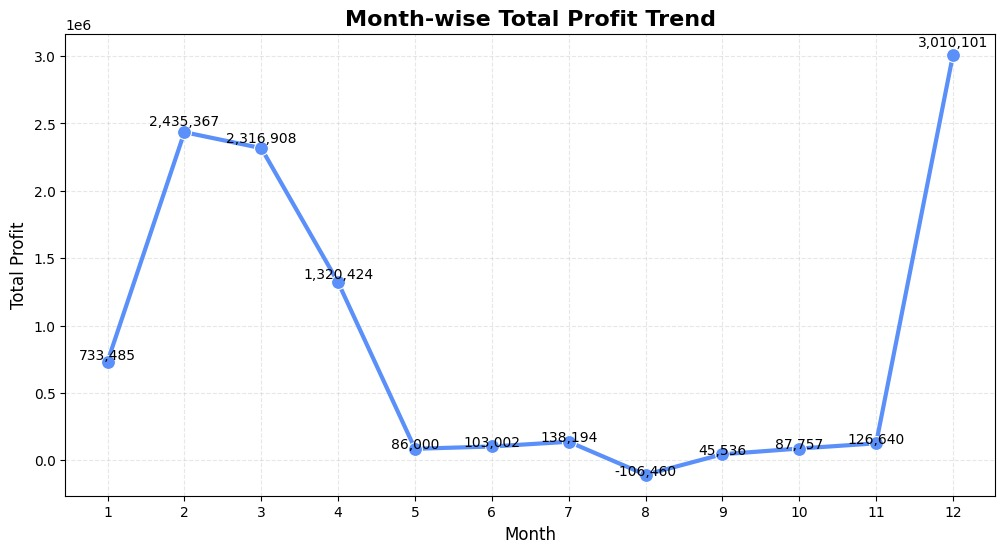

- February & March = Very high profits
- December = Highest profit of the year (3M)
- August = Only loss month
- Mid-year (May–October) = Weak performance
- Early year & year-end = strongest profits
## Top 15 Best Performing Coins
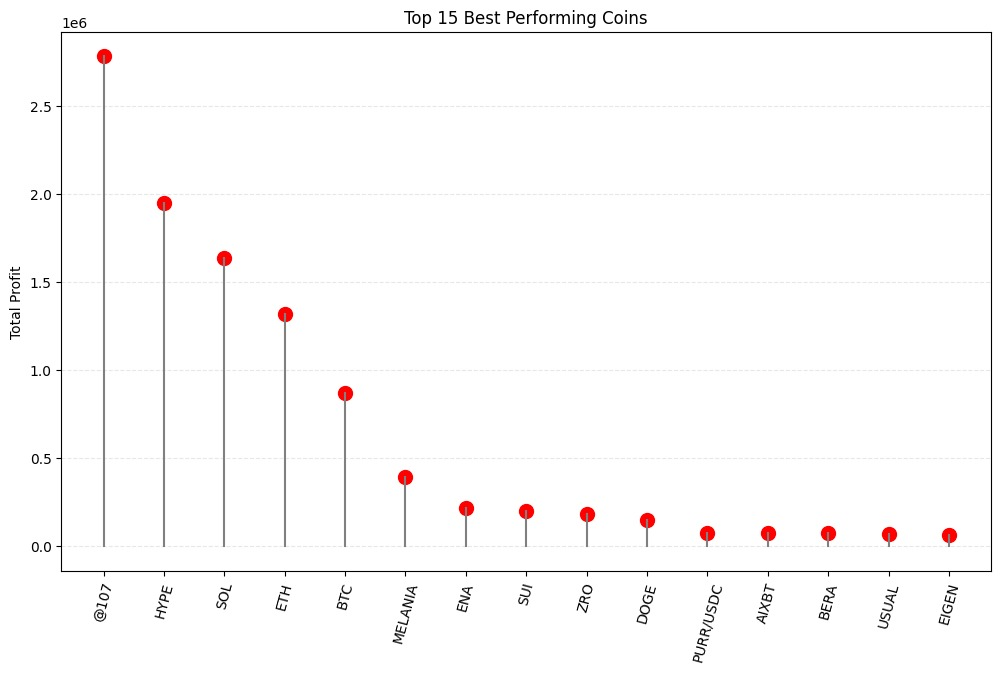
- Platform coins (@107 & HYPE) give the biggest profits
- Large caps (SOL, ETH, BTC, SUI) are extremely reliable
- Selective small caps (ZRO, EIGEN) also perform very well
- Some meme coins like MELANIA also did surprisingly great
  
## Bottom 10 Worst Performing Coins

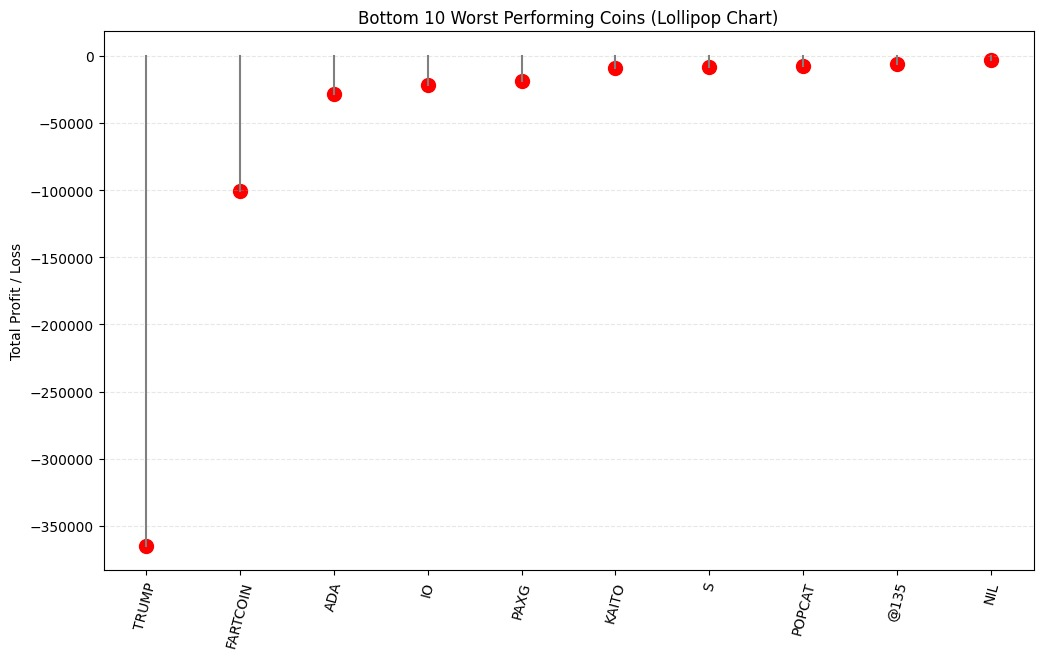
- TRUMP & FARTCOIN = Biggest loss-making coins
- ADA, IO, PAXG = Big cap / mid caps but still negative
- Small caps like KAITO, Popcat also performed poorly
- These 10 coins should be avoided or traded carefully


## Execution Price vs Profit Correlation
![WhatsApp Image 2026-01-26 at 7 31 57 PM](https://github.com/user-attachments/assets/9b3130f9-6559-4a7a-bc6a-4351098cdbc6)

##### Low-price coins = High risk, high reward

- Because low-priced coins are more volatile, 
- they show very large profit and loss swings. 
- That’s why you see big spikes in both directions.

## High-price coins (like BTC) = Low risk, low reward

- High-priced assets are more stable, so their profit
- and loss stays close to zero. That’s why the chart shows
- no dramatic movements for them.**
## Trade Volume per Market Sentiment
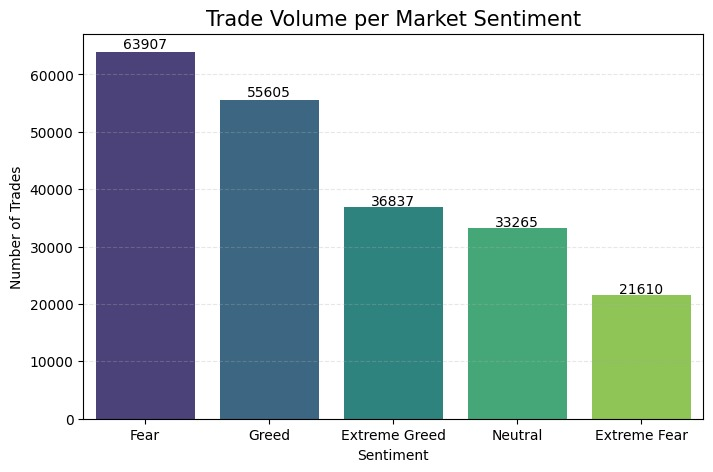

-  Moderate Fear & Greed = High trading activity.
-  Extreme emotions (Extreme Fear/Greed) = low activity.
-  
## Average Trade Size per Sentiment
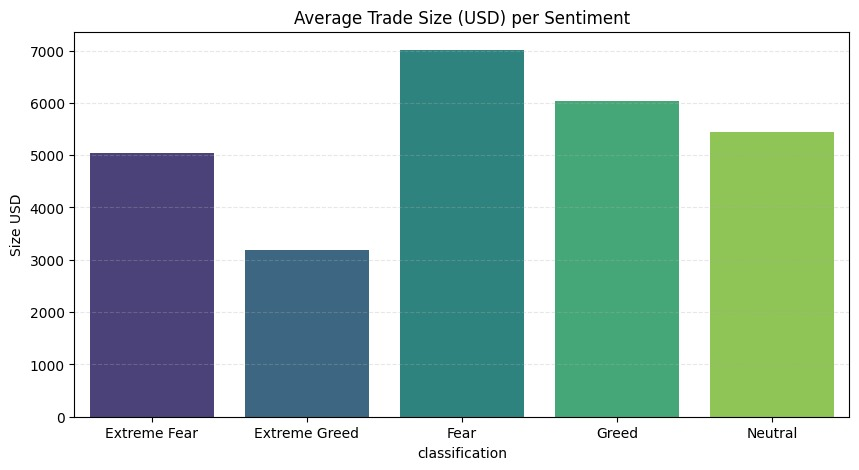
- Extreme Fear → medium trade size (people cautious).
- Extreme Greed → smallest trade size (fear of peak).
- Fear → biggest trade size (dip-buying confidence).
- Greed → large trade size (trend strong).
- Neutral → medium-large trade size.

## Win/Loss Percentage per Market Sentiment

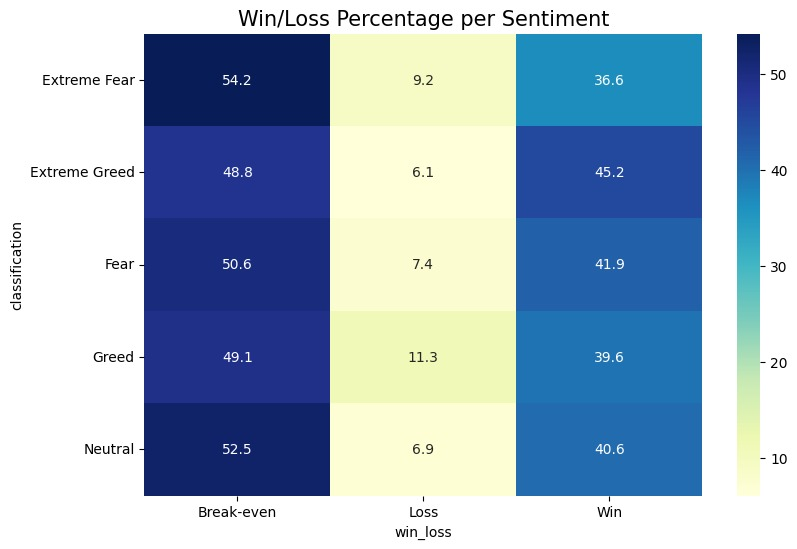
- Extreme Fear   → Most trades end flat, win-rate moderate.
- Extreme Greed  → Highest win-rate, lowest losses. Best trading phase.
- Fear           → Many flat trades, moderate wins, low losses.
- Greed          → Overconfidence leads to highest loss-rate.
- Neutral        → Sideways market → mostly break-even trades.
  
## Position Size vs Profit
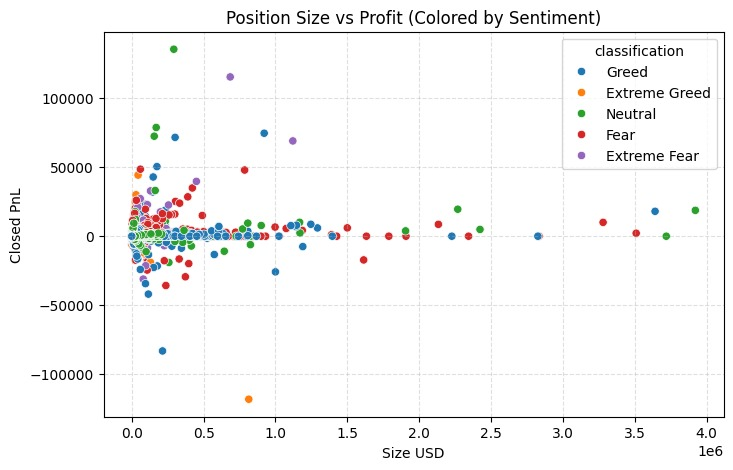
  
- Small trades = biggest wins & biggest losses,
- Large trades = safest but lowest profit,
- Extreme Fear = biggest spikes,
- Greed/Neutral = stable small results.
  
## Profitability by Trade Action
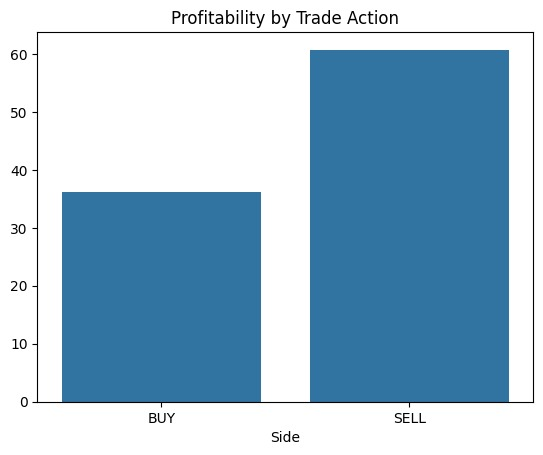
 - SELL trades generate almost double the average 
 - profit compared to BUY trades.

 ## Side × Sentiment × Average Profit
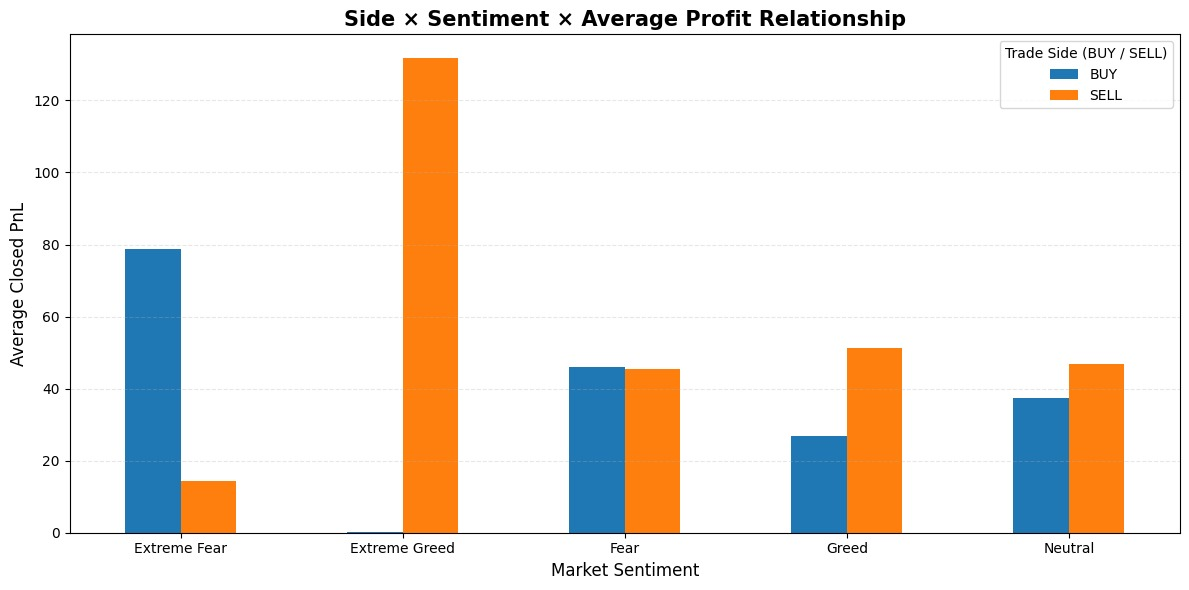
- Extreme Fear → BUY gives the highest returns.
- Extreme Greed → SELL gives the highest returns.
- Fear → BUY and SELL perform equally.
- Greed → SELL outperforms BUY.
- Neutral → SELL slightly better than BUY.

## Final Conclusion : Analysis Overview 
___________________________________________________________________________________________________________________

``This analysis shows how traders behave in different market moods.
The most trading happens in normal Fear and normal Greed because 
traders feel active and confident. 
        In Extreme Fear and Extreme Greed, trading becomes low
        because people get scared — either scared of losing more
        or scared of entering at the top.``
        
`Trade size also follows this: people buy the smallest in Extreme case,
the biggest in normal Fear, and a medium amount in Neutral and normal Greed.
but , still peoples makes most profit in extreme case`

`In extreme greed trades are smallest but still it gives extreme 
profit because of selling coins , since prices are very high.`

`Extreme Fear gives the second-highest profits because prices
bounce back strongly so BUY trades work very well.`
                          `Normal Greed gives the lowest profit
                       because people become overconfident and lose more.
                Neutral mood gives small but steady profit.`
                
 `Coin categories also behave differently. In Extreme Greed, 
 platform coins, some meme coins, and small caps perform the best. 
      In Extreme Fear, large caps, meme coins, and small caps 
     perform well  because the market recovers from low levels.  
 Overall, large caps give the best long-term results because
 they are stable and reliable. Platform coins also give strong profit. 
 But meme coins (most of them), oracle tokens, DeFi tokens, 
 and mid-caps usually lose money.`
 
`Position size matters a lot. Small trades give the biggest wins 
and the biggest losses — they are high risk and high reward. 
Large trades are safer and give small but steady profit. 
Cheap coins are more volatile, so they jump up and down a lot. 
Expensive coins like BTC move slowly and show small profit/loss.`

`Buy and sell performance depends on sentiment:`

`Buy works best in Extreme Fear.
Sell works best in Extreme Greed.
In normal Fear, both Buy and Sell are good.
In Greed, Sell works better.
In Neutral, Sell is slightly better.`

`Overall, Sell trades make almost double
the profit of Buy trades.`

# Best Advice for a Trader
___________________________________________________________________________________________________________________

#### 1) Trade with sentiment, not against it

- Extreme Fear → BUY dips (prices are very low, bounce is strong)
- Extreme Greed → SELL or SHORT (prices are at the top, reversal is common)
- Fear → Both sides work (but be flexible)
- Greed → Prefer selling
- Neutral → Small, safe trades (mostly sell-side)

#### 2) Use small positions in risky phases, large positions in safe phases

- Small positions → Extreme Fear & Extreme Greed
> (High volatility = high risk)
- Big positions → Regular Fear
> (Best dip-buy confidence phase)
- Medium positions → Neutral & Greed

Position sizing is more important than entries.

#### 3) Focus on strong categories only
Our data clearly shows:

**Best performers:**
- Large Caps (SOL, ETH, BTC, SUI)
- Platform coins (@107, HYPE)
- Selective small caps (ZRO, EIGEN)
- Rare meme winners (MELANIA)

Worst performers:

- Meme coins (TRUMP, FARTCOIN, POPCAT)
- Mid caps (IO, STRK)
- Oracle/Utility tokens
- DeFi layers
- PAXG-like stable/utility assets

#### 4) Trade more in Fear & Greed, avoid extremes if you're unsure

- Most trades happen in Fear & Greed → best environment
- Extreme Fear & Extreme Greed → best profits
- But only if one  have experience
- Beginners should increase position slowly in extremes.

#### 5) Use small-size trades on low-priced coins

- Low-price coins = High volatility
- Big profit + big loss potential
- Large-size trades should be on stable assets (BTC, ETH, SOL).

#### 6) Focus more on SELL trades — they give double the profit

Our data shows:

- SELL trades = almost 2× profit of BUY trades
- Profitability increases in Greed & Neutral

      Don’t rely only on “buy low, sell high” —
      learn to short high, buy back low also.

#### 7) Do not trade aggressively mid-year

Our monthwise data says:

- Feb, Mar, Dec → best profit months
- May–Oct       → weak period
- August        → worst month (loss)

Increase trading in Feb/March/Dec, reduce it mid-year.

#### 8) Always respect the rule of extremes

**This is your golden rule:**

- Extreme Fear = BUY
- Extreme Greed = SELL


## Credit and Support Section

### If u like this insights plss
### like ❤️ and comments . it wil motivate 
### me to make more analysis 
### also i would like to give credit to
### my iit wale bhaiya shubham shukla and 
### roylce royce sir Vishwas Mishra sir
### whom keep motivating me ❤️